> Trabalho da disciplina de Inteligência Artificial sobre Pré-Processamento e Análise de Dados. 
>> Feito por: **Henrique Navarro Morais.**

# Instalação⚙️

In [331]:
#!c:\python\python.exe -m pip install --upgrade pip
!pip install -q pandas
!pip install -q tabulate
!pip install -q numpy
!pip install -q matplotlib
!pip install -q scipy
!pip install -U -q scikit-learn
!pip install -U -q imbalanced-learn

In [397]:
#Instação da extensão 'Collapsible Headings'
import os
os.system('pip install -q jupyter_contrib_nbextensions')
os.system('jupyter contrib nbextension install --user')
os.system('jupyter nbextension enable collapsible_headings/main --quiet')

2

# Importando as Bibliotecas necessárias📂

In [611]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import random
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Sobre a Base de Dados📚

> O conjunto de dados que está sendo usado é conhecido como "Adult" e foi extraído do banco de dados do censo dos EUA. Ele foi preparado por Barry Becker a partir do banco de dados do censo de 1994. O objetivo do conjunto de dados é prever se uma pessoa ganha mais ou menos de **U$ 50.000** dólares por ano.

> Link da base de dados: https://archive.ics.uci.edu/ml/datasets/Adult

> Seguem alguns exemplos de vizualização:

In [2]:
#Carregando a base de dados através da biblioteca pandas:
path = r".\databases\adult_database.data"
data = pd.read_csv(path)

In [8]:
#Printar a base de dados:
data.head()

,Idade,Classe Trabalhadora,Peso Amostra Final,Educacao,Num Educacao,Estado Civil,Ocupacao,Relacionamento,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas por Semana,Pais Nativo,Renda
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Atributos

> Em uma base de dados, os atributos são características ou propriedades que descrevem as entidades ou objetos sendo representados

> No caso da base de dados analisadas cada exemplo é composto por **15 atributos.**

In [56]:
print(f"A base de dados possui {data.shape[0]} exemplos e {data.shape[1]} atributos")

A base de dados possui 32561 exemplos e 15 atributos


In [48]:
#Atributos:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Idade                32561 non-null  int64 
 1   Classe Trabalhadora  32561 non-null  object
 2   Peso Amostra Final   32561 non-null  int64 
 3   Educacao             32561 non-null  object
 4   Num Educacao         32561 non-null  int64 
 5   Estado Civil         32561 non-null  object
 6   Ocupacao             32561 non-null  object
 7   Relacionamento       32561 non-null  object
 8   Raca                 32561 non-null  object
 9   Sexo                 32561 non-null  object
 10  Ganho de Capital     32561 non-null  int64 
 11  Perda de Capital     32561 non-null  int64 
 12  Horas por Semana     32561 non-null  int64 
 13  Pais Nativo          32561 non-null  object
 14  Renda                32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Atributo alvo (saída)

> O atributo alvo, é o atributo que representa a informação que desejamos prever ou estimar com base nos demais atributos da base de dados. 

> No caso da sua base de dados, o atributo **'Renda'** seria o atributo alvo, indicando que o objetivo seria prever ou analisar a renda com base nas outras informações disponíveis.

In [78]:
#Exemplos de valores do atributo 'Renda'
display(pd.DataFrame(data.head(10)['Renda'], columns=['Renda']))

,Renda
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,>50K
8,>50K
9,>50K


## Identificação dos tipos de dados

> A identificação dos tipos de dados em uma base de dados é fundamental para compreender a natureza das informações disponíveis. Na base de dados analisada será considerado os seguintes tipos de dados que podem ser categorizados em diferentes categorias:
> * **Categóricos**
    >>  Representam características com valores qualitativos.
> * **Numéricos**
    >> Representam valores numéricos.

In [4]:
#Identificar se os dados são 'Numéricos' ou 'Categóricos'
tabela = [[coluna, 'Numérico' if str(data[coluna].dtype).startswith('int') or str(data[coluna].dtype).startswith('float') else 'Categórico'] for coluna in data.columns]
display(pd.DataFrame(tabela, columns=['Atributo', 'Classificação']))

,Atributo,Classificação
0,Idade,Numérico
1,Classe Trabalhadora,Categórico
2,Peso Amostra Final,Numérico
3,Educacao,Categórico
4,Num Educacao,Numérico
5,Estado Civil,Categórico
6,Ocupacao,Categórico
7,Relacionamento,Categórico
8,Raca,Categórico
9,Sexo,Categórico


## Identificação da escala de dados

> A identificação da escala de dados é relevante para entender a natureza e a magnitude dos valores presentes em uma base de dados. A escala dos dados pode ser dividida em quatro categorias principais:
> * **Nominal** 
    >>Categorizados em diferentes grupos ou categorias, sem qualquer ordem ou hierarquia específica. 
> * **Ordinal**
    >>Possuem uma ordem ou hierarquia específica, mas a diferença entre os valores não é necessariamente uniforme.
> * **Intervalar**
    >>Expressos em valores numéricos com uma diferença uniforme entre eles.
> * **Racional**
    >>Representam um valor numérico absoluto.

In [81]:
#Identificar se os dados são 'Nominais', 'Ordinais', 'Intervalares' ou 'Racionais'
classificacao = ['Intervalar', 'Nominal', 'Racional', 'Nominal', 'Ordinal', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Racional', 'Racional', 'Intervalar', 'Nominal', 'Racional']
atributos = ['Idade', 'Classe Trabalhadora', 'Peso Amostra Final', 'Educacao', 'Num Educacao', 'Estado Civil', 'Ocupacao', 'Relacionamento', 'Raca', 'Sexo', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana', 'Pais Nativo', 'Renda']
df_tabela = pd.DataFrame({'Atributo': atributos, 'Escala': classificacao})
display(df_tabela)

,Atributo,Escala
0,Idade,Intervalar
1,Classe Trabalhadora,Nominal
2,Peso Amostra Final,Racional
3,Educacao,Nominal
4,Num Educacao,Ordinal
5,Estado Civil,Nominal
6,Ocupacao,Nominal
7,Relacionamento,Nominal
8,Raca,Nominal
9,Sexo,Nominal


# Exploração dos dados🔎

> Processo fundamental na análise de dados, que permite **compreender melhor os dados**, descobrir padrões e tendências iniciais, e fornecer insights valiosos para orientar análises posteriores e tomadas de decisão informadas.


> Tal processo envolve a identificação de medidas de *localidade, espalhamento e distribuição.*

## Medidas de localidade

> As medidas de localidade, fornecem informações sobre o **valor central** dos dados, no qual ajudam a entender onde a maioria dos dados está concentrado. Essas medidas ajudam a entender onde a maioria dos dados está concentrada.
    >> Incluem:
    >> * Moda
    >> * Média
    >> * Mediana

> A seguir será aplicado diversas operações para os dados da base de dados, tanto para os numéricos quanto para os categóricos:

In [227]:
operacoes = {
    'Moda': lambda coluna: coluna.mode()[0],
    'Média': lambda coluna: coluna.mean(),
    'Mediana': lambda coluna: coluna.median(),
}

> Medidas de localidade para dados **numéricos** e **categóricos:**

In [228]:
#Calcular 'Moda', Média', 'Mediana', de TODOS os atributos tanto numéricos quanto categóricos
medidas = {}
for coluna in data.columns:
    if pd.api.types.is_numeric_dtype(data[coluna]):
        medidas[coluna] = {operacao: operacoes[operacao](data[coluna]) for operacao in operacoes}
    else:
        medidas[coluna] = {'Moda': data[coluna].mode()[0]}
df_medidas = pd.DataFrame(medidas)
display(df_medidas)

,Idade,Classe Trabalhadora,Peso Amostra Final,Educacao,Num Educacao,Estado Civil,Ocupacao,Relacionamento,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas por Semana,Pais Nativo,Renda
Moda,36.000000,Private,123011.000000,HS-grad,9.000000,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.000000,0.00000,40.000000,United-States,<=50K
Média,38.581647,NaN,189778.366512,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.30383,40.437456,NaN,NaN
Mediana,37.000000,NaN,178356.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,40.000000,NaN,NaN


> A seguir diversas medidas de localidade somente para dados **numéricos:**

In [229]:
#Calcular apenas dos atributos numéricos
medidas = {}
for coluna in data.columns:
    if pd.api.types.is_numeric_dtype(data[coluna]):
        medidas[coluna] = {operacao: operacoes[operacao](data[coluna]) for operacao in operacoes}
df_medidas = pd.DataFrame(medidas)
display(df_medidas)

,Idade,Peso Amostra Final,Num Educacao,Ganho de Capital,Perda de Capital,Horas por Semana
Moda,36.000000,123011.000000,9.000000,0.000000,0.00000,40.000000
Média,38.581647,189778.366512,10.080679,1077.648844,87.30383,40.437456
Mediana,37.000000,178356.000000,10.000000,0.000000,0.00000,40.000000


> Para dados **categóricos** costuma-se aplicar a Moda:

In [12]:
#Moda para atributos categóricos
medidas = {}
for coluna in data.columns:
    if not pd.api.types.is_numeric_dtype(data[coluna]):
        medidas[coluna] = {'Moda': data[coluna].mode()[0]}
df_medidas = pd.DataFrame(medidas)
display(df_medidas)

,Classe Trabalhadora,Educacao,Estado Civil,Ocupacao,Relacionamento,Raca,Sexo,Pais Nativo,Renda
Moda,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K


## Medidas de espalhamento

> As medidas de espalhamento são utilizadas para avaliar a **dispersão** ou variabilidade dos dados em um conjunto de observações. Elas fornecem informações sobre o quão distantes os valores estão uns dos outros e da medida central dos dados.
    >> Incluem:
    >> * Desvio padrão
    >> * Quartis
    >> * Percentis
    >> * Variância
    >> * Amplitude
    >> * Intervalo interquartil (IQR)
    >> * Coeficiente de variação (CV)
    

> Para os dados **numéricos**, pode-se aplicar todas as operações definidas:

In [216]:
operacoes = {
    '1º Q': lambda coluna: coluna.quantile(0.25),
    '2º Q': lambda coluna: coluna.quantile(0.50),
    '3º Q': lambda coluna: coluna.quantile(0.75),
    'Desvio Padrão': lambda coluna: coluna.std(),
    'Variância': lambda coluna: coluna.var(),
    'Amplitude': lambda coluna: coluna.max() - coluna.min(),
    'Intervalo Interquartil': lambda coluna: coluna.quantile(0.75) - coluna.quantile(0.25),
    'Coeficiente Variação': lambda coluna: coluna.std() / coluna.mean() * 100
}

In [217]:
medidas = {}
for coluna in data.columns:
    if pd.api.types.is_numeric_dtype(data[coluna]):
        medidas[coluna] = {}
        for operacao, funcao in operacoes.items():
            medidas[coluna][operacao] = funcao(data[coluna])

df_medidas = pd.DataFrame(medidas)
display(df_medidas)

,Idade,Peso Amostra Final,Num Educacao,Ganho de Capital,Perda de Capital,Horas por Semana
1º Q,28.000000,1.178270e+05,9.000000,0.000000e+00,0.000000,40.000000
2º Q,37.000000,1.783560e+05,10.000000,0.000000e+00,0.000000,40.000000
3º Q,48.000000,2.370510e+05,12.000000,0.000000e+00,0.000000,45.000000
Desvio Padrão,13.640433,1.055500e+05,2.572720,7.385292e+03,402.960219,12.347429
Variância,186.061400,1.114080e+10,6.618890,5.454254e+07,162376.937814,152.458995
Amplitude,73.000000,1.472420e+06,15.000000,9.999900e+04,4356.000000,98.000000
Intervalo Interquartil,20.000000,1.192240e+05,3.000000,0.000000e+00,0.000000,5.000000
Coeficiente Variação,35.354718,5.561750e+01,25.521299,6.853153e+02,461.560758,30.534633


> Para os dados **categóricos**, pode-se usar:

In [219]:
operacoes = {
    'Número de categorias distintas': lambda coluna: coluna.nunique(),
}

In [220]:
medidas = {}
for coluna in data.columns:
    if not pd.api.types.is_numeric_dtype(data[coluna]):
        medidas[coluna] = {}
        for operacao, funcao in operacoes.items():
            medidas[coluna][operacao] = funcao(data[coluna])

df_medidas = pd.DataFrame(medidas)
display(df_medidas)

,Classe Trabalhadora,Educacao,Estado Civil,Ocupacao,Relacionamento,Raca,Sexo,Pais Nativo,Renda
Número de categorias distintas,9,16,7,15,6,5,2,42,2


> É possível aprofundar na função **.value_counts()** que retorna a quantidade de cada estado de determiando atributo, e descobrir mais informações sobre as categorias da base de dados analisada.

### Frequência das Categorias

In [17]:
atributos = ['Classe Trabalhadora', 'Educacao', 'Estado Civil', 'Ocupacao', 'Relacionamento', 'Raca', 'Sexo', 'Pais Nativo', 'Renda']

def montar_tabela(atributo):
    estado = {}
    if atributo in data.columns:
        estado[atributo] = data[atributo].value_counts()

    df = pd.DataFrame(estado)
    df = df.fillna(0).astype(int)
    return df

for atributo in atributos:
    display(montar_tabela(atributo))


,Classe Trabalhadora
Classe Trabalhadora,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


,Educacao
Educacao,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


,Estado Civil
Estado Civil,
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


,Ocupacao
Ocupacao,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


,Relacionamento
Relacionamento,
Husband,13193
Not-in-family,8305
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


,Raca
Raca,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


,Sexo
Sexo,
Male,21790
Female,10771


,Pais Nativo
Pais Nativo,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


,Renda
Renda,
<=50K,24720
>50K,7841


> É possível verificar que essa base de dados é **desbalanceada** através da frequência da categoria 'Renda', no qual pode assumir dois valores (<=50k e >50k).

> Fica claro esse desbalanceamento uma vez que os exemplos que ganham menos que 50k são de 24720, já os que ganham mais que 50k são apenas 7841

## Medidas de distribuição

> As medidas de distribuição são utilizadas para analisar a **forma e a natureza** da distribuição dos dados em um conjunto de observações.Essas medidas fornecem informações sobre a simetria, o achatamento e a forma geral da distribuição dos dados. 
>> Incluem:
>> * Assimetria 
>> * Curtose 
>> * Histograma
>> * Gráfico de densidade
>> * Testes de normalidade 
>> * QQ plot 
>> * Box plot 

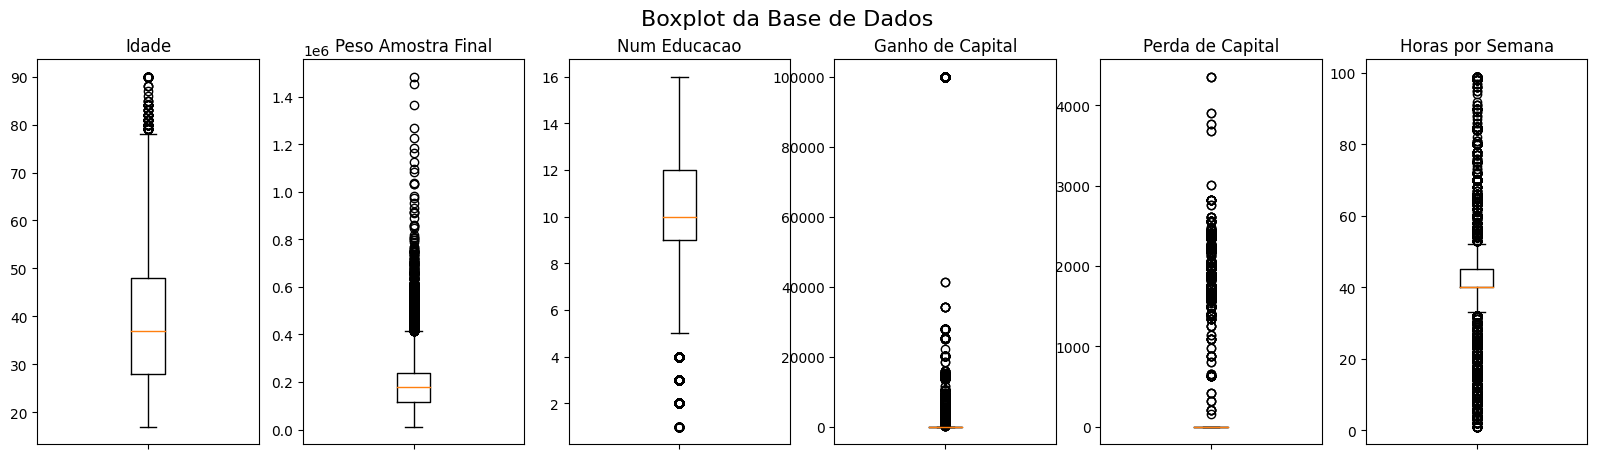

In [159]:
#Definição da função para plotar boxplot
atributos = ['Idade', 'Peso Amostra Final', 'Num Educacao', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']
fig, axs = plt.subplots(1, len(atributos), figsize=(20, 5))
for i, atributo in enumerate(atributos):
    axs[i].boxplot(data[atributo])
    axs[i].set_title(atributo)
    
plt.setp(axs, xticks=[1], xticklabels=[''])
plt.suptitle('Boxplot da Base de Dados', fontsize=16)
plt.show()

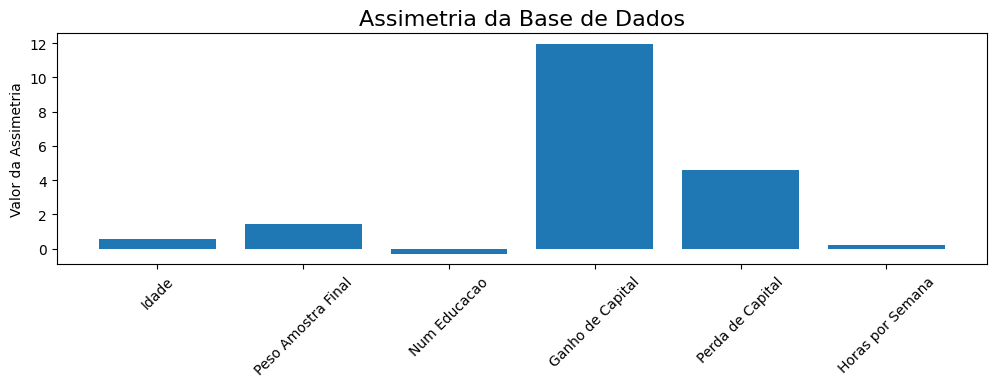

In [155]:
#Definição da função para plotar assimetria
atributos = ['Idade', 'Peso Amostra Final', 'Num Educacao', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']
assimetrias = []
valores = []

for atributo in atributos:
    assimetria = data[atributo].skew()
    assimetrias.append(assimetria)
    valores.append(atributo)

plt.figure(figsize=(12, 3)) 
plt.bar(valores, assimetrias)
plt.ylabel('Valor da Assimetria')
plt.title('Assimetria da Base de Dados', fontsize=16)
plt.xticks(rotation=45)
plt.show()

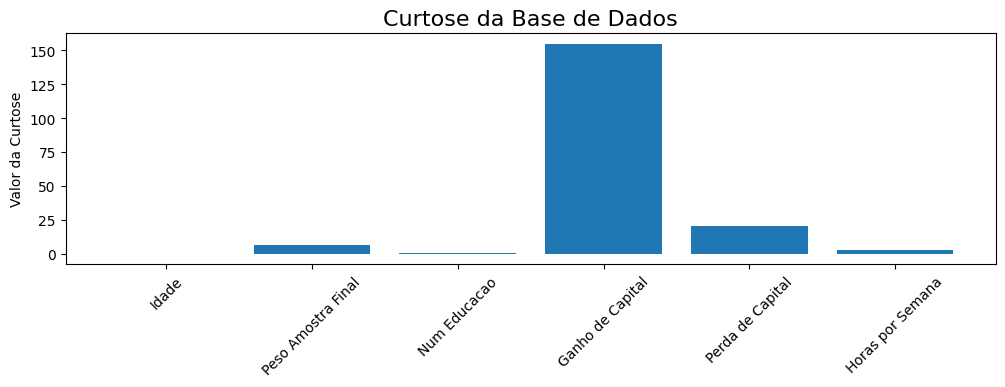

In [156]:
#Definição da função para plotar curtose
atributos = ['Idade', 'Peso Amostra Final', 'Num Educacao', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']
curtoses = []
for atributo in atributos:
    curtose = data[atributo].kurtosis()
    curtoses.append(curtose)

plt.figure(figsize=(12, 3)) 
plt.bar(atributos, curtoses)
plt.ylabel('Valor da Curtose')
plt.title('Curtose da Base de Dados', fontsize=16)
plt.xticks(rotation=45)
plt.show()

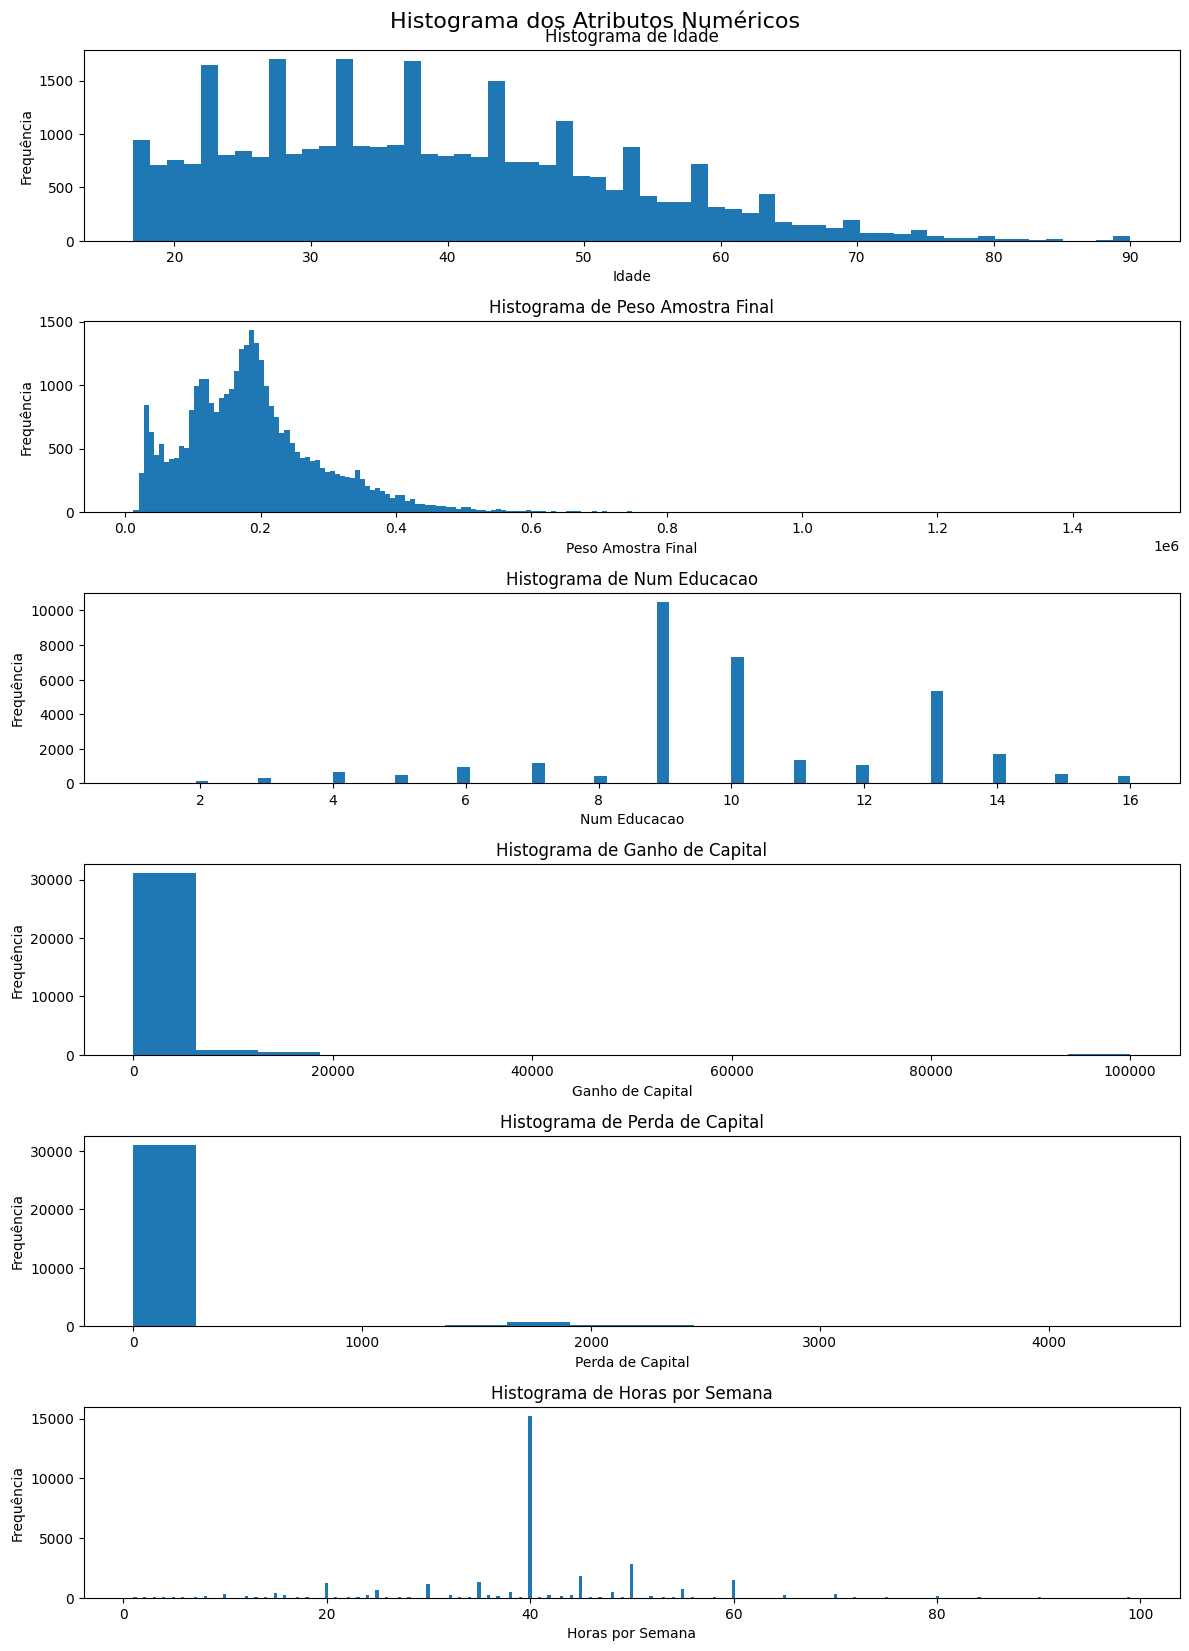

In [154]:
#Definição da função para plotar histogramas
def plot_histogram_numeric(data, attributes):
    numeric_data = data[attributes].select_dtypes(include=np.number)
    num_attributes = len(numeric_data.columns)
    fig, axs = plt.subplots(num_attributes, 1, figsize=(12, num_attributes*2.8))
    fig.suptitle('Histograma dos Atributos Numéricos', fontsize=16)
    
    for i, column in enumerate(numeric_data.columns):
        axs[i].hist(numeric_data[column], bins='auto')
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Frequência')
        axs[i].set_title('Histograma de ' + column)
    plt.tight_layout()
    plt.show()
    
attributes = ['Idade', 'Peso Amostra Final', 'Num Educacao', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']
plot_histogram_numeric(data, attributes)

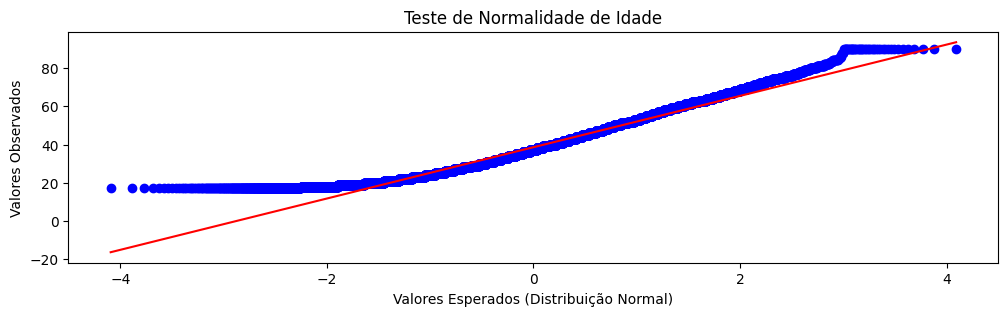

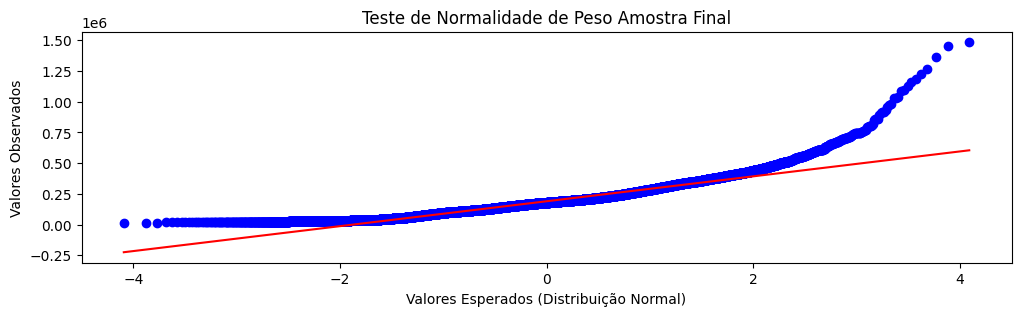

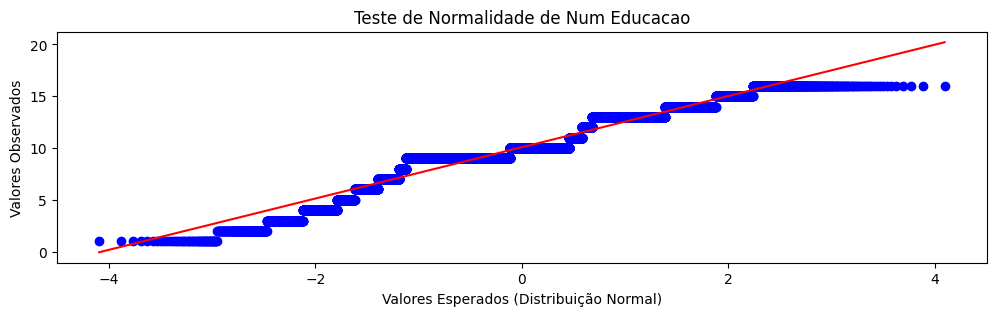

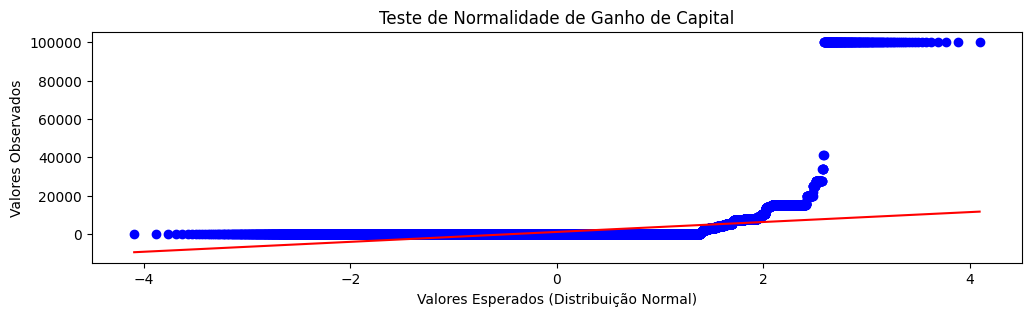

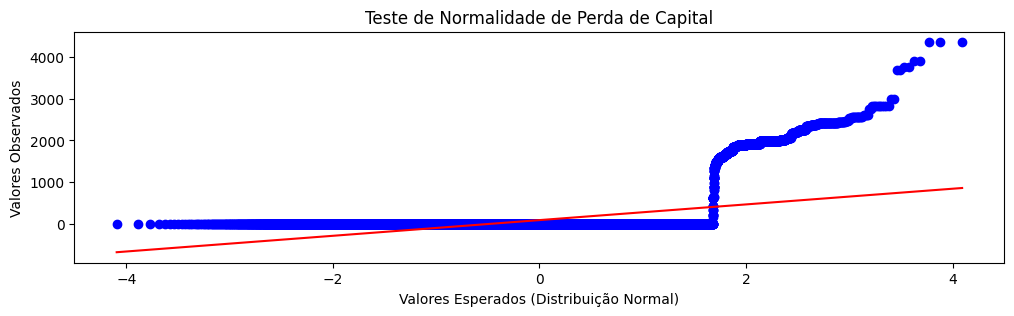

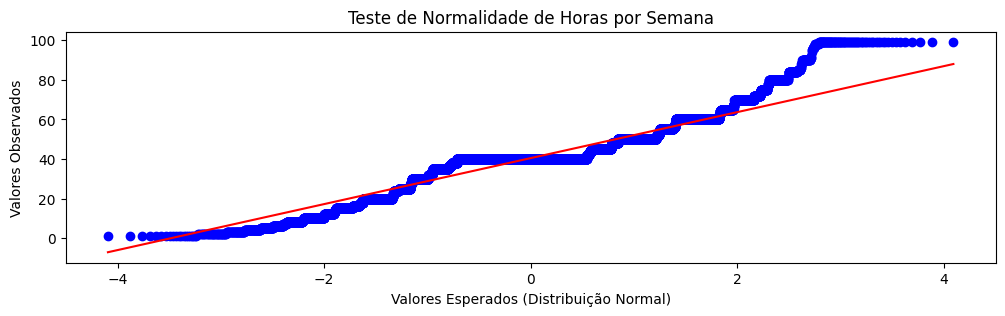

In [151]:
#Definição da função para plotar testes de normalidade
attributes = ['Idade', 'Peso Amostra Final', 'Num Educacao', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']
for attribute in attributes:
    plt.figure(figsize=(12, 3))
    stats.probplot(data[attribute], dist='norm', plot=plt)
    plt.xlabel('Valores Esperados (Distribuição Normal)')
    plt.ylabel('Valores Observados')
    plt.title('Teste de Normalidade de ' + attribute)
    plt.show()

> **Boxplot** é um gráfico estatístico que representa a distribuição de dados por meio de quartis. 
> Ele é composto por uma caixa retangular que representa o intervalo entre o primeiro quartil (25%) e o terceiro quartil (75%), com uma linha vertical no meio que indica a mediana (segundo quartil).

> **Assimetria** é uma medida estatística que indica o grau de assimetria da distribuição de dados ao redor da média. Ela mede a falta de simetria de uma distribuição.

> **Curtose** é uma medida estatística que indica o grau de concentração dos valores em torno da média de uma distribuição. Ela mede o pico da distribuição.

> **Histograma** é uma representação gráfica da distribuição de frequência de um conjunto de dados contínuos. Ele divide o intervalo dos dados em uma série de intervalos e conta quantos valores pertencem a cada intervalo.

> **Testes de normalidade** são métodos estatísticos utilizados para verificar se uma amostra de dados segue uma distribuição normal. Esses testes são importantes porque muitas técnicas estatísticas têm suposições de normalidade dos dados, e a validade dos resultados pode depender dessa suposição.

> A função **.describe()** que mostra informações relevantes sobre a base de dados, juntamente com os gráficos plotados na tela, ajudam a coompreender e visualizar de maneira mais fácil e eficiente os dados da base de dados.

> Essas visualizações e estatísticas auxiliam na compreensão da *distribuição dos dados, identificação de padrões, detecção de valores atípicos, avaliação da simetria e achatamento da distribuição*, além de verificar se os dados seguem uma *distribuição normal*.
> Essas informações são fundamentais para a análise exploratória de dados e para embasar decisões estatísticas e modelagem estatística.

In [164]:
data.describe()

,Idade,Peso Amostra Final,Num Educacao,Ganho de Capital,Perda de Capital,Horas por Semana
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Conjunto de Teste💾

> Um conjunto de testes é uma porção separada de dados usada para avaliar o desempenho de um modelo ou sistema em situações reais. Sua importância reside em fornecer uma medida objetiva do desempenho do modelo em dados não vistos anteriormente, permitindo identificar problemas e melhorar a qualidade do modelo.

## Análise da base de dados de teste

> Pode-se comparar ambas bases de dados através do método **.describe()** que ajuda a visualizar diversas medidas sobre os atributos

In [3]:
#Carregando a base de dados teste:
path = r".\databases\adult.test"
data_teste = pd.read_csv(path)

In [4]:
print(f"A base de dados original possui {data.shape[0]} exemplos e {data.shape[1]} atributos\n")
print(f"A base de dados teste possui {data_teste.shape[0]} exemplos e {data_teste.shape[1]} atributos\nO que implica em uma base de dados com metade dos exemplos.")

A base de dados original possui 32561 exemplos e 15 atributos

A base de dados teste possui 16281 exemplos e 15 atributos
O que implica em uma base de dados com metade dos exemplos.


In [5]:
data_teste.describe(include='all')

,Idade,Classe Trabalhadora,Peso Amostra Final,Educacao,Num Educacao,Estado Civil,Ocupacao,Relacionamento,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas por Semana,Pais Nativo,Renda
count,16281.000000,16281,1.628100e+04,16281,16281.000000,16281,16281,16281,16281,16281,16281.000000,16281.000000,16281.000000,16281,16281
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K.
freq,NaN,11210,NaN,5283,NaN,7403,2032,6523,13946,10860,NaN,NaN,NaN,14662,12435
mean,38.767459,NaN,1.894357e+05,NaN,10.072907,NaN,NaN,NaN,NaN,NaN,1081.905104,87.899269,40.392236,NaN,NaN
std,13.849187,NaN,1.057149e+05,NaN,2.567545,NaN,NaN,NaN,NaN,NaN,7583.935968,403.105286,12.479332,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.167360e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.778310e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.383840e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [6]:
data.describe(include='all')

,Idade,Classe Trabalhadora,Peso Amostra Final,Educacao,Num Educacao,Estado Civil,Ocupacao,Relacionamento,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas por Semana,Pais Nativo,Renda
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


> Pode-se também plotar gráficos de **histograma** entre as bases para melhor visualização

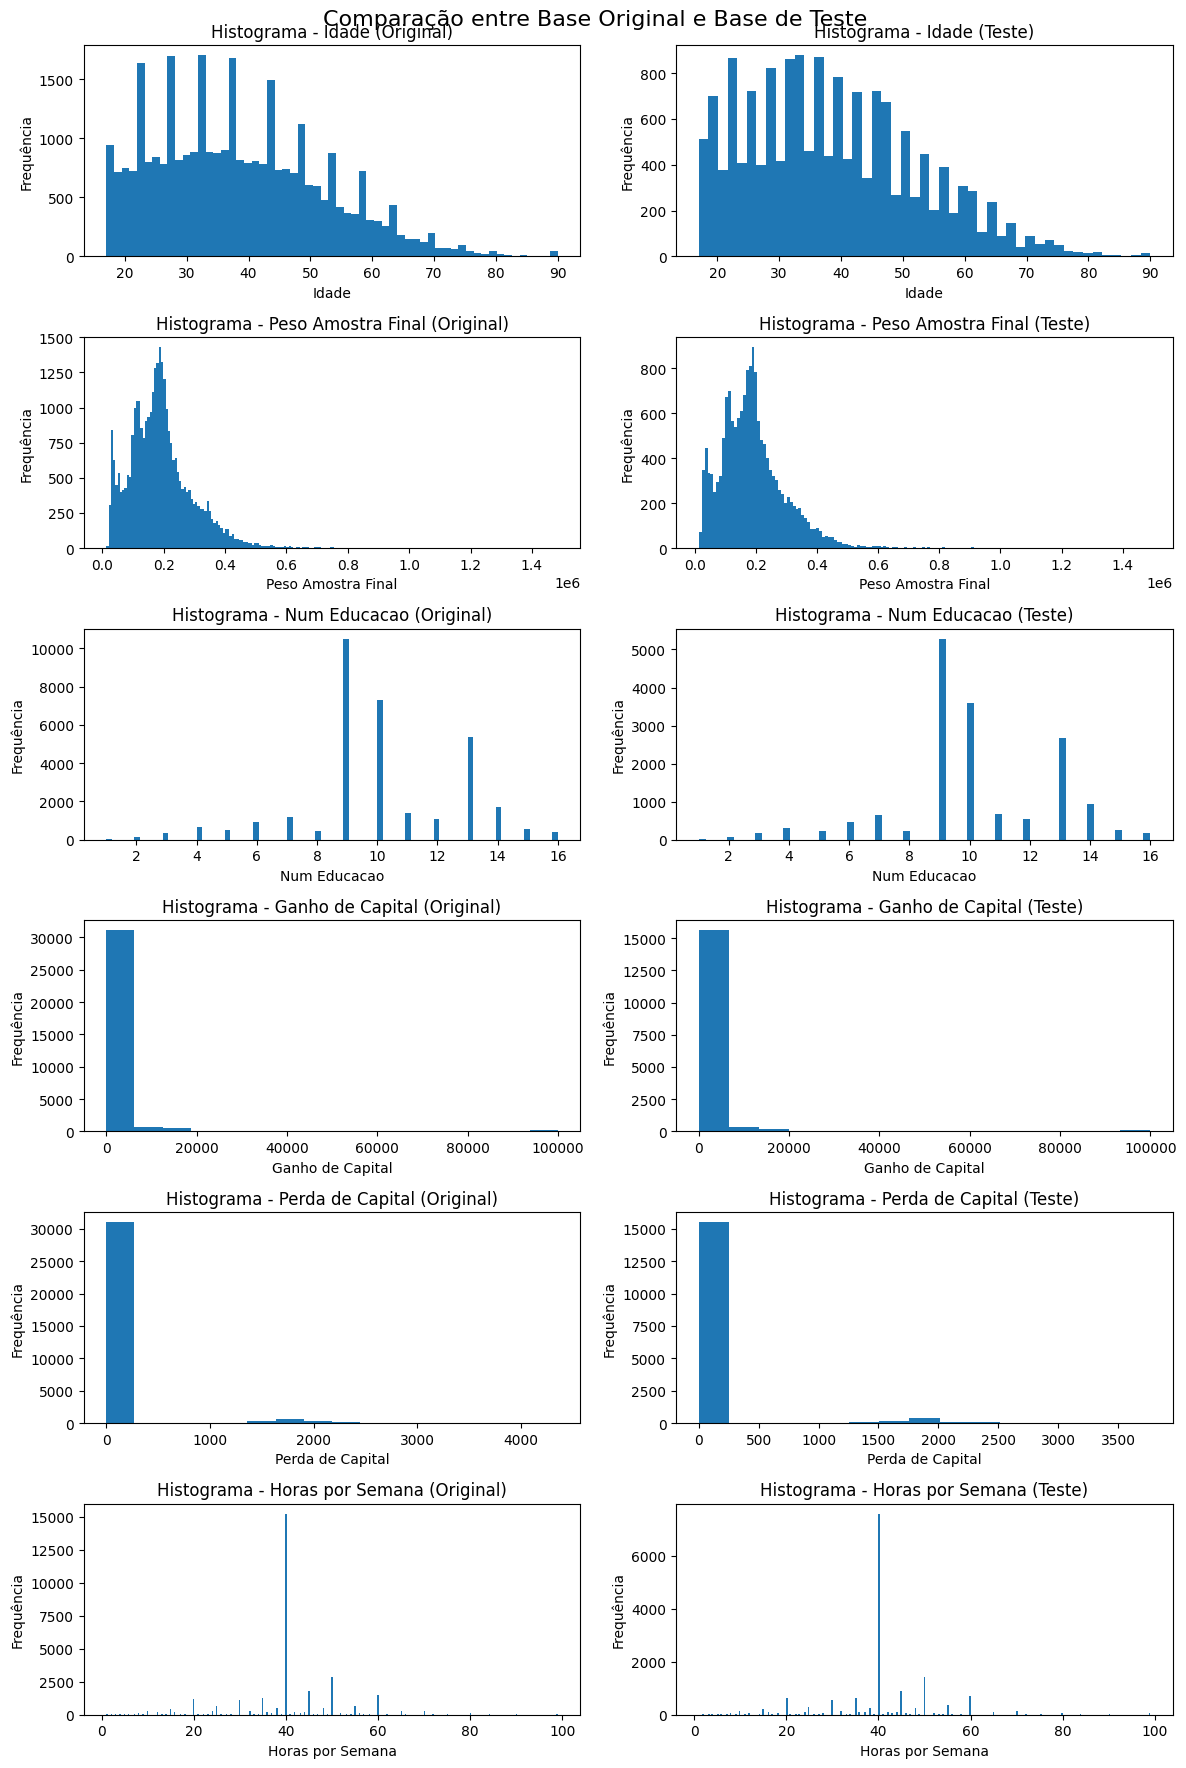

In [25]:
def compare_data_histograma(data, data_teste):
    num_attributes = data.select_dtypes(include=np.number).columns
    
    fig, axs = plt.subplots(len(num_attributes), 2, figsize=(12, len(num_attributes)*3))
    fig.suptitle('Comparação entre Base Original e Base de Teste', fontsize=16)
    
    for i, attribute in enumerate(num_attributes):
        axs[i, 0].hist(data[attribute], bins='auto')
        axs[i, 0].set_xlabel(attribute)
        axs[i, 0].set_ylabel('Frequência')
        axs[i, 0].set_title('Histograma - ' + attribute + ' (Original)')
        
        axs[i, 1].hist(data_teste[attribute], bins='auto')
        axs[i, 1].set_xlabel(attribute)
        axs[i, 1].set_ylabel('Frequência')
        axs[i, 1].set_title('Histograma - ' + attribute + ' (Teste)')
        
    plt.tight_layout()
    plt.show()

compare_data_histograma(data, data_teste)

> Pode-se também plotar gráficos de **boxplot** entre as bases para melhor visualização

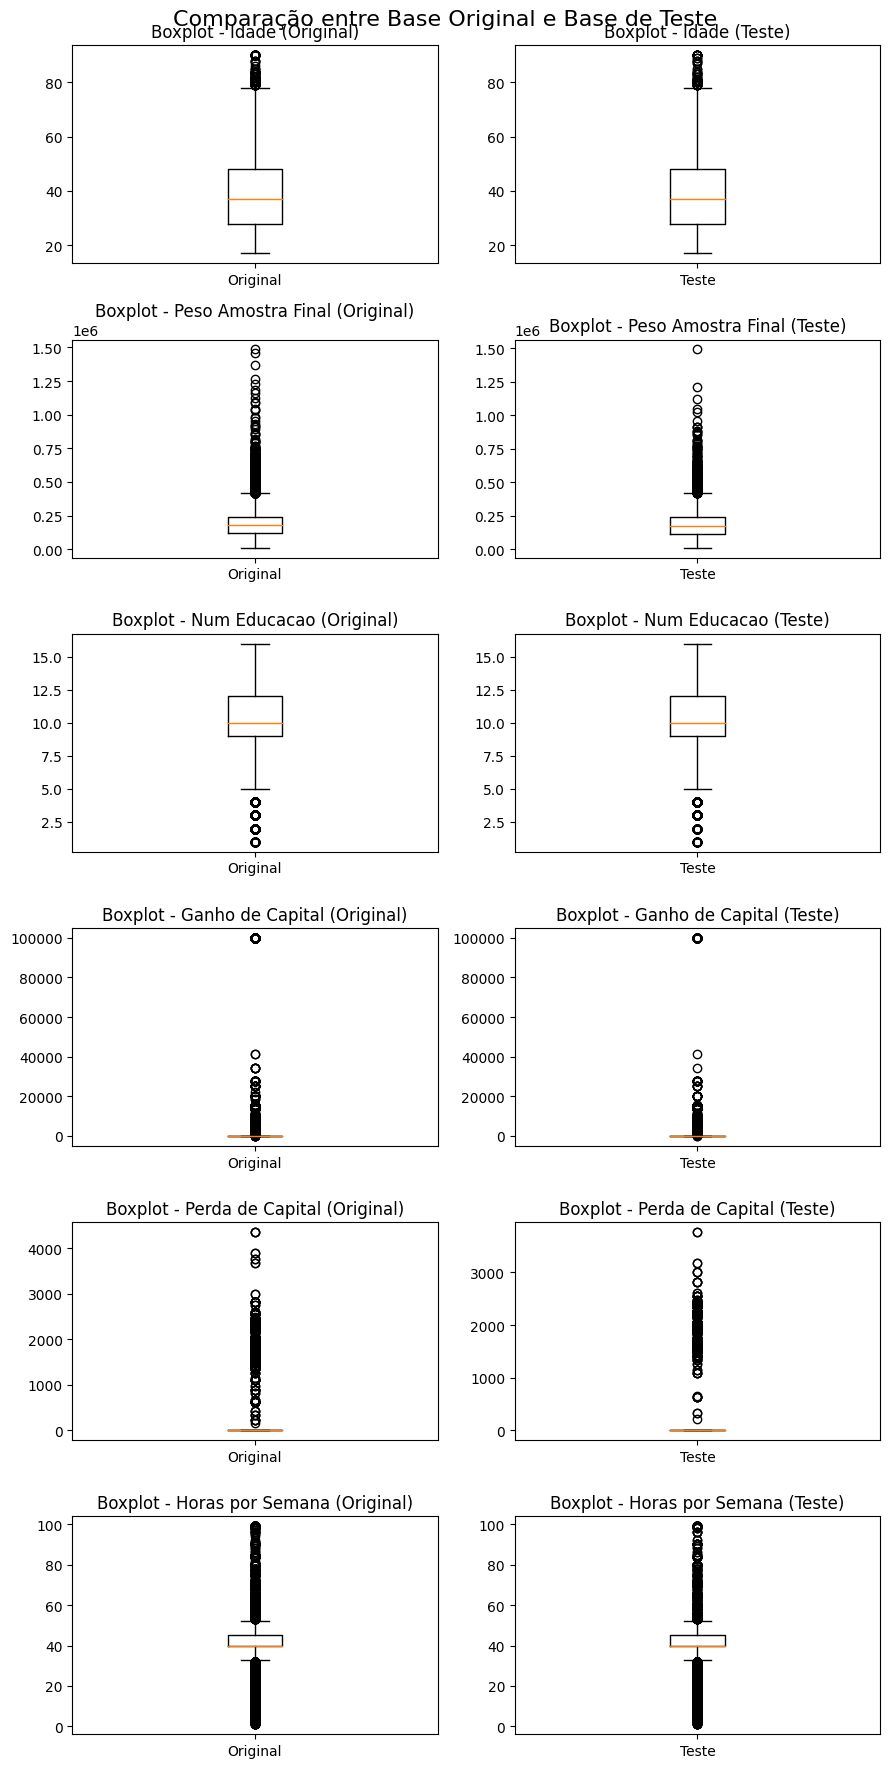

In [26]:
def compare_data_boxplot(data, data_teste):
    num_attributes = data.select_dtypes(include=np.number).columns
    
    fig, axs = plt.subplots(len(num_attributes), 2, figsize=(9, len(num_attributes)*3))
    fig.suptitle('Comparação entre Base Original e Base de Teste', fontsize=16)
    
    for i, attribute in enumerate(num_attributes):
        axs[i, 0].boxplot(data[attribute])
        axs[i, 0].set_xticklabels(['Original'])
        axs[i, 0].set_title('Boxplot - ' + attribute + ' (Original)')
        
        axs[i, 1].boxplot(data_teste[attribute])
        axs[i, 1].set_xticklabels(['Teste'])
        axs[i, 1].set_title('Boxplot - ' + attribute + ' (Teste)')
        
    plt.tight_layout()
    plt.show()
compare_data_boxplot(data, data_teste)

> Gráficos de **dispesão** são ótimos para visualização dos dados

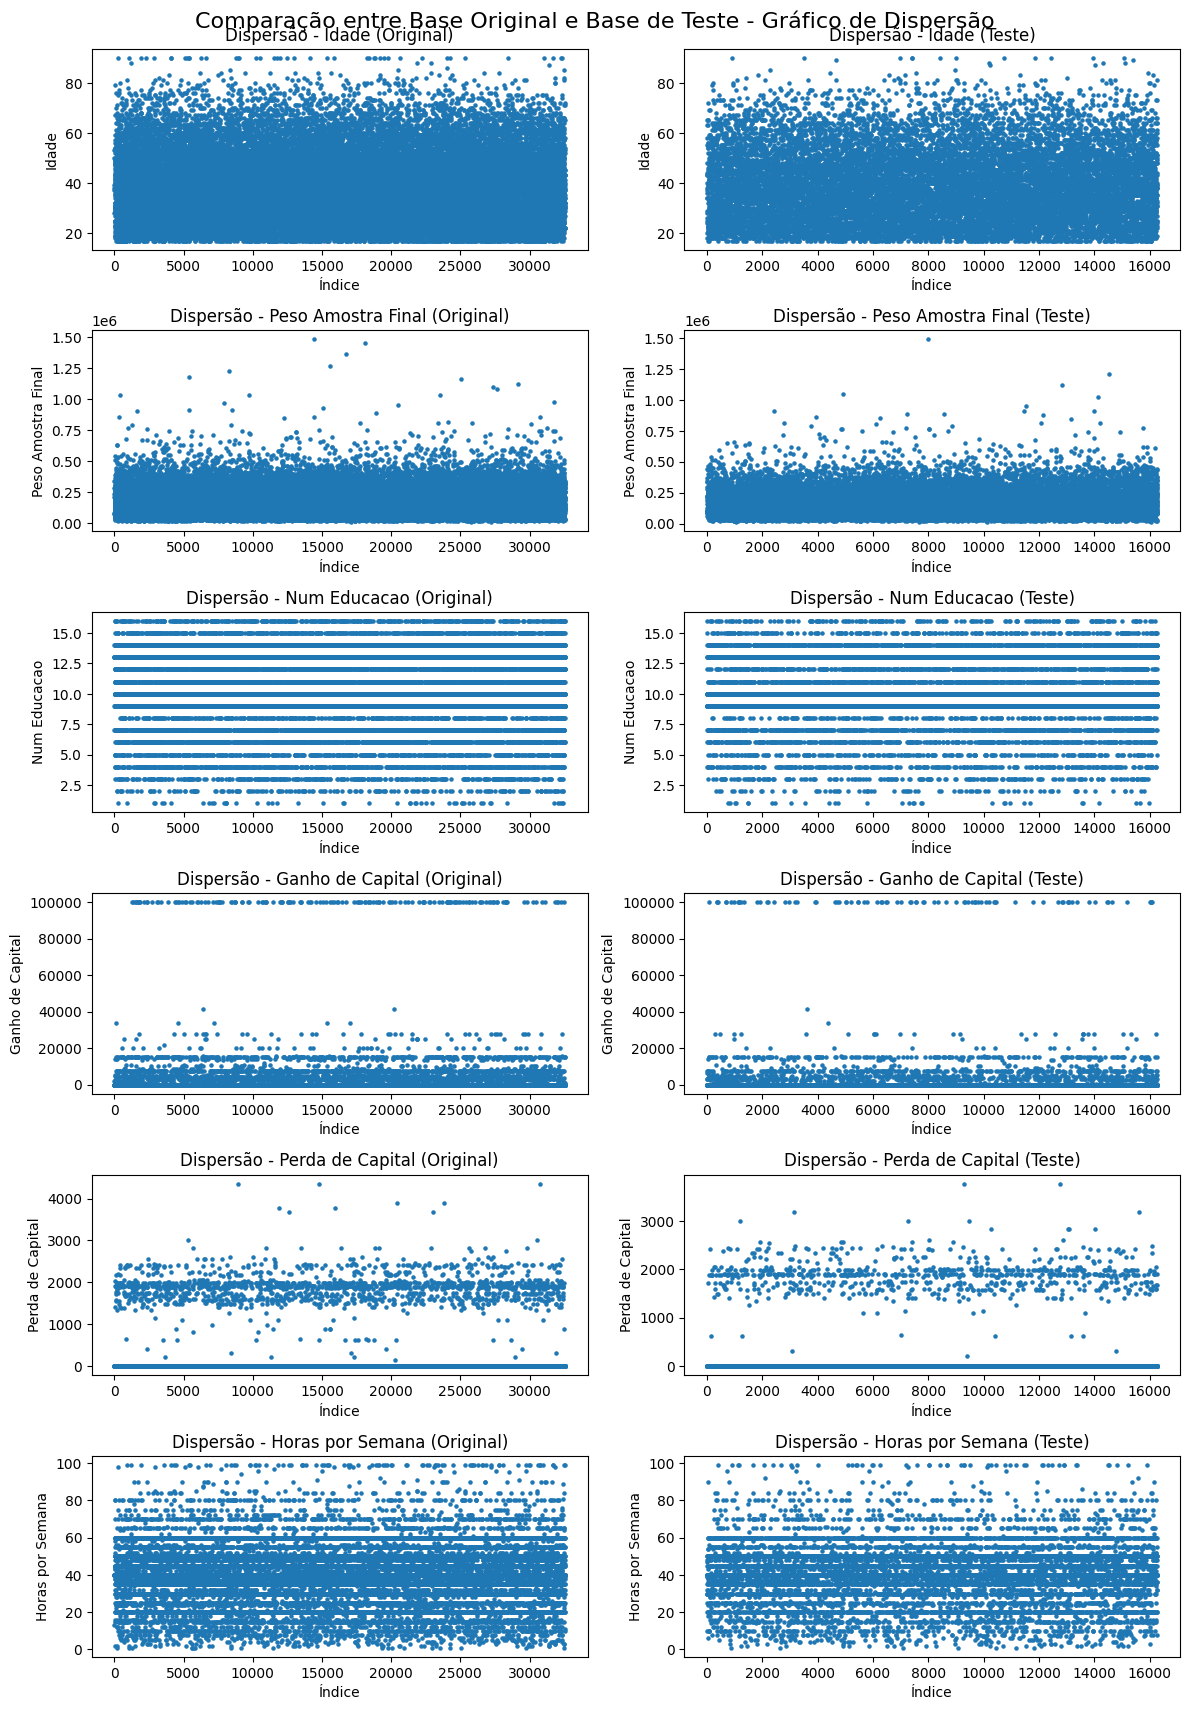

In [32]:
def compare_data_scatter(data, data_teste):
    num_attributes = data.select_dtypes(include=np.number).columns

    fig, axs = plt.subplots(len(num_attributes), 2, figsize=(12, len(num_attributes)*2.9))
    fig.suptitle('Comparação entre Base Original e Base de Teste - Gráfico de Dispersão', fontsize=16)

    for i, attribute in enumerate(num_attributes):
        axs[i, 0].scatter(range(len(data)), data[attribute], s=5)
        axs[i, 0].set_xlabel('Índice')
        axs[i, 0].set_ylabel(attribute)
        axs[i, 0].set_title('Dispersão - ' + attribute + ' (Original)')

        axs[i, 1].scatter(range(len(data_teste)), data_teste[attribute], s=5)
        axs[i, 1].set_xlabel('Índice')
        axs[i, 1].set_ylabel(attribute)
        axs[i, 1].set_title('Dispersão - ' + attribute + ' (Teste)')

    plt.tight_layout()
    plt.show()

compare_data_scatter(data, data_teste)

## Conclusão

> Após comparar as bases de dados usando gráficos de histograma, boxplot e dispersão, pode-se obter informações valiosas sobre a similaridade entre a base original e a base de teste. Aqui está um breve relatório sobre os resultados obtidos:
>
> **Histograma:**
>> Os histogramas permitem visualizar a distribuição dos valores de cada atributo nas duas bases de dados.
Nota-se que a forma e a tendência das distribuições são semelhantes entre as bases original e de teste.
>> Isso indica que os valores dos atributos estão sendo preservados na base de teste, mantendo características importantes do conjunto original.
>
> **Boxplot:**
>> Os boxplots mostram a distribuição dos dados por meio de quartis, mediana, outliers e intervalo interquartil.
Ao comparar os boxplots, nota-se que as medidas estatísticas, como quartis e mediana, são próximas entre as bases original e de teste.
>> Isso sugere que os atributos estão sendo preservados de forma consistente na base de teste, com valores semelhantes aos do conjunto original.
>
> **Dispersão:**
>> Os gráficos de dispersão mostram a relação entre dois atributos, permitindo observar a dispersão dos pontos.
Ao comparar os gráficos de dispersão, podemos identificar se a relação entre os atributos é preservada na base de teste.
Se os pontos seguem uma tendência semelhante e mantêm uma relação coerente, isso indica que a base de teste reflete adequadamente as características do conjunto original.
>
> Pode-se concluir que a **base de dados de testes** fornecida **mantém as mesmas características da base de dados original.**

# Eliminação de Atributos💣

> A eliminação de atributos é o processo de remover características irrelevantes, redundantes ou prejudiciais de um conjunto de dados. Isso melhora a eficiência e a precisão do modelo, simplifica a interpretação dos resultados e otimiza o conjunto de dados.
>
> Para aplicação de tais operações, foi criado uma copia da base de dados original chamada **'data_pre'.**

In [3]:
#Criando uma cópia da base de dados original
data_pre = data.copy()

> Atributos que podem ser considerados menos relevantes para o modelo de previsão e podem ser removidos:
>
>>**Peso Amostra Final,**
>>
>>**Estado Civil,**
>>
>>**Relacionamento,**
>>
>>**Pais Nativo**
>>
>>**Idade**

In [4]:
#Removendo atributos que não são importantes.
data_pre = data_pre.drop('Peso Amostra Final', axis=1)
data_pre = data_pre.drop('Estado Civil', axis=1)
data_pre = data_pre.drop('Relacionamento', axis=1)
data_pre = data_pre.drop('Pais Nativo', axis=1)
#data_pre = data_pre.drop('Idade', axis=1)
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Idade                32561 non-null  int64 
 1   Classe Trabalhadora  32561 non-null  object
 2   Educacao             32561 non-null  object
 3   Num Educacao         32561 non-null  int64 
 4   Ocupacao             32561 non-null  object
 5   Raca                 32561 non-null  object
 6   Sexo                 32561 non-null  object
 7   Ganho de Capital     32561 non-null  int64 
 8   Perda de Capital     32561 non-null  int64 
 9   Horas por Semana     32561 non-null  int64 
 10  Renda                32561 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.7+ MB


> A decisão de considerar ou não os atributos **"Sexo"** e **"Raça"** na previsão de renda depende do contexto, da ética e da legislação aplicável. Esses atributos podem ser sensíveis e estão relacionados a questões de equidade, justiça social e discriminação.

> Em alguns casos, a inclusão desses atributos pode fornecer informações relevantes para o modelo e capturar desigualdades sociais e disparidades salariais. Por outro lado, a inclusão desses atributos pode gerar viés e discriminação em potencial.

> Para esta análise tais atributos **não serão levados em consideração.**

In [5]:
#Eliminação de atributos sensíveis que não serão considerados nessa análise.
data_pre = data_pre.drop('Raca', axis=1)
data_pre = data_pre.drop('Sexo', axis=1)

data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Idade                32561 non-null  int64 
 1   Classe Trabalhadora  32561 non-null  object
 2   Educacao             32561 non-null  object
 3   Num Educacao         32561 non-null  int64 
 4   Ocupacao             32561 non-null  object
 5   Ganho de Capital     32561 non-null  int64 
 6   Perda de Capital     32561 non-null  int64 
 7   Horas por Semana     32561 non-null  int64 
 8   Renda                32561 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.2+ MB


In [6]:
print(f"A base de dados pré-processada possui {data_pre.shape[0]} exemplos e {data_pre.shape[1]} atributos\n")

A base de dados pré-processada possui 32561 exemplos e 9 atributos



In [7]:
#atributos = ['Classe Trabalhadora', 'Educacao', 'Estado Civil', 'Ocupacao', 'Relacionamento', 'Raca', 'Sexo', 'Pais Nativo', 'Renda']
atributos = data_pre.columns
def montar_tabela(atributo):
    estado = {}
    if atributo in data_pre.columns:
        estado[atributo] = data_pre[atributo].value_counts()

    df = pd.DataFrame(estado)
    df = df.fillna(0).astype(int)
    return df

for atributo in atributos:
    display(montar_tabela(atributo))

,Idade
Idade,
36,898
31,888
34,886
23,877
35,876
...,...
83,6
88,3
85,3


,Classe Trabalhadora
Classe Trabalhadora,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


,Educacao
Educacao,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


,Num Educacao
Num Educacao,
9,10501
10,7291
13,5355
14,1723
11,1382
7,1175
12,1067
6,933
4,646


,Ocupacao
Ocupacao,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


,Ganho de Capital
Ganho de Capital,
0,29849
15024,347
7688,284
7298,246
99999,159
...,...
1111,1
2538,1
22040,1


,Perda de Capital
Perda de Capital,
0,31042
1902,202
1977,168
1887,159
1848,51
...,...
2080,1
1539,1
1844,1


,Horas por Semana
Horas por Semana,
40,15217
50,2819
45,1824
60,1475
35,1297
...,...
82,1
92,1
87,1


,Renda
Renda,
<=50K,24720
>50K,7841


# Limpeza de Dados🧹

> **Limpeza de dados** é o processo de corrigir erros e inconsistências em conjuntos de dados, garantindo sua **qualidade** e **confiabilidade** para análises e modelagem.

In [414]:
#Criando um backup da base pré-processada
data_clean = data_pre.copy()
print(f'A base de dados possui {data_clean.shape[0]} exemplos.')

A base de dados possui 32561 exemplos.


## Dados Ausentes

> Para essa análise, será dividida em duas partes: os **dados categóricos** e os **dados numéricos.**
> 
> Posteriormente, serão considerádos duas metodologias, a de **remover os dados faltante**s e a de **preencher esses dados com estimativas.**

### Categóricos

> Primeiro, será feita uma análise dos dados **categóricos.**

In [224]:
#Atributos categóricos da base de dados:
atributos = ['Classe Trabalhadora', 'Educacao', 'Ocupacao']

In [58]:
atributos = data_clean.columns
somatorio = 0

for atributo in atributos:
    linhas_faltantes = data_clean.loc[data_clean[atributo].eq(' ?')]
    somatorio += linhas_faltantes.shape[0]

print(f"O número total de dados faltantes é: {somatorio}, representando {round(somatorio*100/data_clean.shape[0], 2)}% da base de dados total")

O número total de dados faltantes é: 3679, representando 11.3% da base de dados total


> Note que a quantidade de dados faltantes é altíssima, mais de **11%** da base de dados.
> 
> Caso opte-se por **remover** esses exemplos com dados faltantes, pode ser que ocorra a perda de informações importantes, e por consequência, pode gerar o **underfitting** do modelo.

In [61]:
# Remover exemplos com valores faltantes representados por '?'
data_clean_rm = data_clean.replace(' ?', pd.NA).dropna(how='any')
print(f'Foram removidos um total de {data_clean.shape[0]-data_clean_rm.shape[0]} exemplos da base de dados')

Foram removidos um total de 1843 exemplos da base de dados


> Pode-se verificar através da frequência de cada valor que os atributos podem assumir, nota-se que **não existe mais nenhum exemplo** em que os atributos assumam o valor de **'?'**, porém foi **descartada uma parte considerável de exemplos** da base de dados.

In [479]:
atributos = ['Classe Trabalhadora', 'Educacao', 'Ocupacao']
def montar_tabela(data, atributo):
    estado = {}
    if atributo in data.columns:
        estado[atributo] = data[atributo].value_counts()

    df = pd.DataFrame(estado)
    df = df.fillna(0).astype(int)
    return df

for atributo in atributos:
    display(montar_tabela(data_clean, atributo))

,Classe Trabalhadora
Classe Trabalhadora,
Private,14000
Self-emp-not-inc,2267
Local-gov,1780
HS-grad,1300
State-gov,1161
Self-emp-inc,1018
Federal-gov,853
Without-pay,14
Never-worked,7


,Educacao
Educacao,
HS-grad,6060
Some-college,4669
Bachelors,3802
Masters,1442
Assoc-voc,1151
Assoc-acdm,965
11th,856
10th,715
7th-8th,560


,Ocupacao
Ocupacao,
Prof-specialty,3202
Exec-managerial,3001
Sales,2526
Craft-repair,2498
Adm-clerical,2266
Other-service,2078
Transport-moving,1205
Machine-op-inspct,1148
Handlers-cleaners,859


> Outra abordagem é **preencher os exemplos** com valores faltantes em vez de remove-los.
>
> Pode-se utilizar de diversas técnicas de preenchimento de atributos categóricos:
>> **Moda**
>>
>> **Aleatório**
>>
>> **Constante**
> 
> Todas as técnicas citadas possuem suas **vantagens**, e suas **desvantagens**, vale lembra que nenhum método é **100% eficáz**, uma vez que são métodos que procuram **estimar** valores.

> A primeira técnica a ser analisada consiste em calcular a **moda** (valor que aparece com maior frequência) dos respectivos atributos da base de dados, e utilizar esse valor para preencher os campos com valores ausentes.

In [200]:
#Função responsável por preencher os valores faltantes da base de dados (moda)
def preencher_dados_faltantes(data, valores):
    data_clean = data.replace(' ?', pd.NA)
    for coluna, valor in zip(data_clean.columns, valores):
        data_clean[coluna] = data_clean[coluna].fillna(valor)
    return data_clean

valores = []
atributos = ['Classe Trabalhadora', 'Educacao', 'Ocupacao']
for atributo in atributos:
    valores.append(data_clean[atributo].mode()[0])
print(f'A moda dos respectivos atributos são respectivamente:\n')
print('\n'.join([f'{atributo}: {valor}' for atributo, valor in zip(atributos, valores)]))
data_filled_moda = preencher_dados_faltantes(data_clean, valores)

A moda dos respectivos atributos são respectivamente:

Classe Trabalhadora:  Private
Educacao:  HS-grad
Ocupacao:  Prof-specialty


In [201]:
atributos = data_clean.columns
somatorio = 0
for atributo in atributos:
    linhas_faltantes = data_filled_moda.loc[data_filled_moda[atributo].eq(' ?')]
    somatorio += linhas_faltantes.shape[0]
print(f"Note que agora a quantidade de atributos faltantes é: {somatorio}, utilizando a moda para preencher os valores ausentes")

Note que agora a quantidade de atributos faltantes é: 0, utilizando a moda para preencher os valores ausentes


> Preenchimento pela **moda:**
>
>> **Prós:**       Preserva a distribuição dos dados existentes, adequado para atributos categóricos.
>>
>> **Contras:**    Não considera a correlação com outros atributos, pode introduzir viés.

> Outra abordagem seria preencher os valores com **valores aleatórios.**

In [364]:
# Função responsável por preencher os valores faltantes da base de dados com valores aleatórios
def preencher_dados_faltantes(data, atributos):
    data_clean = data.replace(' ?', pd.NA)
    for atributo in atributos:
        valores_unicos = data_clean[atributo].dropna().unique()  # Obter os valores únicos existentes no atributo
        
        if data_clean[atributo].isna().sum() > 0:  # Verificar se há valores faltantes para o atributo
            valores_aleatorios = random.choices(valores_unicos, k=data_clean[atributo].isna().sum())  # Gerar valores aleatórios
            
            # Verificar se a contagem de valores aleatórios é menor do que a quantidade de valores faltantes
            if len(valores_aleatorios) < data_clean[atributo].isna().sum():
                valores_aleatorios += random.choices(valores_unicos, k=data_clean[atributo].isna().sum() - len(valores_aleatorios))
            
            data_clean.loc[data_clean[atributo].isna(), atributo] = valores_aleatorios  # Preencher os valores faltantes com os valores aleatórios
            
            contagem_valores = {valor: valores_aleatorios.count(valor) for valor in set(valores_aleatorios)}  # Contagem dos valores escolhidos aleatoriamente
            
            print(f'\nValores aleatórios escolhidos para o atributo {atributo} e suas respectivas quantidades:')
            for valor, contagem in contagem_valores.items():
                print(f'[{contagem}]{valor}')
        else:
            print(f'\nO atributo {atributo} não possui valores faltantes.')
    
    return data_clean

atributos = ['Classe Trabalhadora', 'Educacao', 'Ocupacao']
data_filled_rand = preencher_dados_faltantes(data_clean, atributos)


Valores aleatórios escolhidos para o atributo Classe Trabalhadora e suas respectivas quantidades:
[211] Without-pay
[257] Never-worked
[189] State-gov
[244] Self-emp-inc
[238] Self-emp-not-inc
[219] Local-gov
[248] Private
[230] Federal-gov

O atributo Educacao não possui valores faltantes.

Valores aleatórios escolhidos para o atributo Ocupacao e suas respectivas quantidades:
[135] Tech-support
[144] Protective-serv
[120] Priv-house-serv
[136] Exec-managerial
[113] Adm-clerical
[130] Sales
[167] Armed-Forces
[141] Other-service
[114] Handlers-cleaners
[131] Transport-moving
[125] Farming-fishing
[113] Prof-specialty
[140] Craft-repair
[134] Machine-op-inspct


> Preenchimento com **valores aleatórios:**
> 
>> **Prós:** Evita valores viesados, preserva a variabilidade dos dados.
>> 
>> **Contras:** Pode introduzir variação excessiva, resultados inconsistentes em diferentes execuções.

> A técnica de se atribuir um **valor constante** aqueles que estão faltando, pode ser feito da seguinte forma:

In [205]:
# Função responsável por preencher os valores faltantes da base de dados com um valor constante
def preencher_dados_faltantes_constante(data, atributos, valores):
    data_clean = data.replace(' ?', pd.NA)
    valores_preenchidos = {}  # Dicionário para armazenar a contagem de valores preenchidos por atributo
    
    for atributo, valor in zip(atributos, valores):
        valores_faltantes = data_clean[atributo].isna().sum()  # Quantidade de valores faltantes
        data_clean[atributo] = data_clean[atributo].fillna(valor)  # Preencher os valores faltantes
        valores_preenchidos[atributo] = valores_faltantes - data_clean[atributo].isna().sum()  # Calcular a quantidade de valores preenchidos
    
    print('Foram considerados os seguintes atributos, seus respectivos valores constantes e a quantidade:\n')
    for atributo, valor in zip(atributos, valores):
        print(f'{atributo}: {valor} ({valores_preenchidos[atributo]} valores preenchidos)')
    
    return data_clean

valores = ['State-gov', '10th', 'Farming-fishing']
atributos = ['Classe Trabalhadora', 'Educacao', 'Ocupacao']

data_filled_const = preencher_dados_faltantes_constante(data_clean, atributos, valores)

Foram considerados os seguintes atributos, seus respectivos valores constantes e a quantidade:

Classe Trabalhadora: State-gov (1836 valores preenchidos)
Educacao: 10th (0 valores preenchidos)
Ocupacao: Farming-fishing (1843 valores preenchidos)


> Preenchimento por **valor constante:**
> 
>> **Prós:** Simples e rápido de implementar, preserva a estrutura da base de dados.
>>
>> **Contras:** Não considera a distribuição dos dados, pode introduzir informações artificiais.

### Numéricos

In [225]:
#Atributos numéricos da base de dados:
atributos = ['Idade','Num Educacao', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']

In [217]:
# Remover exemplos com valores representados por 0
data_clean_rv = data_clean.replace(0, pd.NA).dropna(how='any')
print(f'Foram removidos um total de {data_clean.shape[0]-data_clean_rv.shape[0]} exemplos da base de dados')

Foram removidos um total de 32561 exemplos da base de dados


> Nota-se que **remover** exemplos cujo apresentam valor **0**, não é válido, uma vez que todos os atributos possuem pelo menos alguma instância com valor **zero.**

> Fazendo a análise dos **atributos numéricos**, pode-se ocorrer que os valores assumam o valor **0**, justamente por estarem ausentes, ou por representarem de fato esse valor.
>
> Pode-se utilizar diversas técnicas para tratar dados ausentes em atributos numéricos, dentre elas:
>> **Moda**
>>
>> **Média**
>>
>> **Mediana**
>>
>> **Aleatório**

> **Moda**

In [345]:
#Função responsável por preencher os valores faltantes da base de dados (moda)
def preencher_zeros_com_moda(data, atributos):
    data_filled = data.copy()
    
    for atributo in atributos:
        moda = data_filled[atributo].mode()[0]
        data_filled.loc[data_filled[atributo] == 0, atributo] = moda
    
    return data_filled

atributos = ['Idade', 'Num Educacao', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']
data_fill_num_moda = preencher_zeros_com_moda(data_clean, atributos)

print('A moda dos respectivos atributos são:\n')
for atributo, valor in zip(atributos, valores):
    print(f'{atributo}: {valor}')

data_fill_num_moda.head()

A moda dos respectivos atributos são:

Idade: 38
Num Educacao: 10
Ganho de Capital: 1077
Perda de Capital: 87
Horas por Semana: 40


,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
0,39,State-gov,Bachelors,13,Adm-clerical,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,0,0,13,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,0,0,40,<=50K
3,53,Private,11th,7,Handlers-cleaners,0,0,40,<=50K
4,28,Private,Bachelors,13,Prof-specialty,0,0,40,<=50K


> Preenchimento pela **moda.**
>> Prós: É uma medida robusta e adequada para dados categóricos. Preserva a estrutura de frequência dos dados.
>> 
>> Contras: Pode não ser representativa para distribuições assimétricas ou com caudas longas. Não é adequada para dados numéricos contínuos.

> **Média**

In [363]:
#Função responsável por preencher os valores faltantes da base de dados (média)
def preencher_zeros_com_moda(data, atributos):
    data_filled = data.copy()
    
    for atributo in atributos:
        media = int(data_filled[atributo].mean())
        data_filled.loc[data_filled[atributo] == 0, atributo] = media
    
    return data_filled

atributos = ['Idade', 'Num Educacao', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']
data_fill_num_media = preencher_zeros_com_moda(data_clean, atributos)

print('A media dos respectivos atributos são:\n')
for atributo, valor in zip(atributos, valores):
    print(f'{atributo}: {valor}')

data_fill_num_media.head()

A media dos respectivos atributos são:

Idade: 38
Num Educacao: 10
Ganho de Capital: 1077
Perda de Capital: 87
Horas por Semana: 40


,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
0,39,State-gov,Bachelors,13,Adm-clerical,2174,87,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,1077,87,13,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,1077,87,40,<=50K
3,53,Private,11th,7,Handlers-cleaners,1077,87,40,<=50K
4,28,Private,Bachelors,13,Prof-specialty,1077,87,40,<=50K


> Preenchimento pela **Média:**

>> Prós: É sensível a todos os valores da amostra e adequada para distribuições simétricas. Pode ser usada em dados numéricos contínuos.
>> 
>> Contras: É sensível a valores extremos (outliers), podendo distorcer a medida central. Pode não ser representativa para distribuições assimétricas.

> **Mediana** pode ser usada

In [361]:
#Função responsável por preencher os valores faltantes da base de dados (mediana)
def preencher_zeros_com_mediana(data, atributos):
    data_filled = data.copy()
    
    for atributo in atributos:
        mediana = int(data_filled[atributo].median())
        data_filled.loc[data_filled[atributo] == 0, atributo] = mediana
    
    return data_filled

atributos = ['Idade', 'Num Educacao', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']
data_fill_num_mediana = preencher_zeros_com_mediana(data_clean, atributos)

print('A mediana dos respectivos atributos são:\n')
for atributo in atributos:
    mediana = data_fill_num_mediana[atributo].median()
    print(f'{atributo}: {mediana}')

data_fill_num_mediana.head()

A mediana dos respectivos atributos são:

Idade: 37.0
Num Educacao: 10.0
Ganho de Capital: 0.0
Perda de Capital: 0.0
Horas por Semana: 40.0


,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
0,39,State-gov,Bachelors,13,Adm-clerical,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,0,0,13,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,0,0,40,<=50K
3,53,Private,11th,7,Handlers-cleaners,0,0,40,<=50K
4,28,Private,Bachelors,13,Prof-specialty,0,0,40,<=50K


> Preenchimento pela **Mediana:**

>> Prós: É uma medida robusta e adequada para dados numéricos. É menos sensível a valores extremos do que a média.
>> 
>>Contras: Pode não ser representativa para distribuições com caudas longas. Não é adequada para dados categóricos.

> **Aleatório**

In [353]:
def preencher_zeros_aleatorios(data, atributos):
    data_clean = data.copy()
    for coluna in atributos:
        min_valor = data_clean[coluna].min()
        max_valor = data_clean[coluna].max()
        valores_aleatorios = np.random.randint(min_valor, max_valor+1, size=data_clean[coluna].eq(0).sum())
        data_clean.loc[data_clean[coluna] == 0, coluna] = valores_aleatorios
    
    return data_clean


atributos = ['Idade', 'Num Educacao', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']
data_fill_num_random = preencher_zeros_aleatorios(data_clean, atributos)

display(data_fill_num_random.head())

,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
0,39,State-gov,Bachelors,13,Adm-clerical,2174,3985,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,42728,3901,13,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,99063,2970,40,<=50K
3,53,Private,11th,7,Handlers-cleaners,52777,3351,40,<=50K
4,28,Private,Bachelors,13,Prof-specialty,1728,944,40,<=50K


> Pode-se verificar através de tabelas como fica a distruição de valores aleatórios principalmente nos atributos **Ganho de Capital** e **Perda de Capital.**
> 
> Os valores aleatórios são **inteiros** que variam entre o **valor mínimo** e o **valor máximo** que determinado atributo pode assumir.

> Preenchimento pelo **Valores aleatórios:**
>> Prós: Introduz variação e imita a aleatoriedade dos dados originais. Pode ser útil quando não há informação suficiente sobre os valores ausentes.
>> 
>> Contras: Pode introduzir viés nos dados, especialmente se a distribuição original não for levada em consideração. Pode levar a resultados não realistas ou distorcer a análise.

### Conclusão

> Para esta base de dados que está sendo analisada, serão usadas técnicas de **moda** para aos atributos **categóricos**, e **mediana** para os atributos **numéricos.**
>
> Essas escolhas são justificadas pela robustez dessas medidas e sua adequação aos diferentes tipos de dados. 
>
> A mediana é menos sensível a valores extremos, o que a torna uma escolha segura para dados numéricos. Já a moda é uma medida simples e intuitiva para dados categóricos, representando o valor mais frequente. Essas técnicas garantem uma imputação razoável dos dados ausentes, preservando a estrutura e características dos dados originais.






In [366]:
data_sem_ausentes = data_clean.copy()

In [372]:
atributos = ['Classe Trabalhadora', 'Educacao', 'Ocupacao']
def preencher_dados_faltantes(data, valores):
    data_clean = data.replace(' ?', pd.NA)
    for coluna, valor in zip(data_clean.columns, valores):
        data_clean[coluna] = data_clean[coluna].fillna(valor)
    return data_clean

valores = []
for atributo in atributos:
    valores.append(data_sem_ausentes[atributo].mode()[0])
data_sem_ausentes = preencher_dados_faltantes(data_sem_ausentes, valores)

In [371]:
atributos = ['Idade', 'Num Educacao', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']
def preencher_zeros_com_mediana(data, atributos):
    data_filled = data.copy()
    for atributo in atributos:
        mediana = int(data_filled[atributo].median())
        data_filled.loc[data_filled[atributo] == 0, atributo] = mediana
    return data_filled

data_sem_ausentes = preencher_zeros_com_mediana(data_sem_ausentes, atributos)

In [381]:
atributos = data_sem_ausentes.columns
somatorio = 0

for atributo in atributos:
    linhas_faltantes = data_sem_ausentes.loc[data_sem_ausentes[atributo].eq(' ?')]
    somatorio += linhas_faltantes.shape[0]

print(f"O número total de dados faltantes é: {somatorio}, representando {round(somatorio*100/data_sem_ausentes.shape[0], 2)}% da base de dados total")
display(data_sem_ausentes.head())

O número total de dados faltantes é: 0, representando 0.0% da base de dados total


,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
0,39,State-gov,Bachelors,13,Adm-clerical,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,0,0,13,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,0,0,40,<=50K
3,53,Private,11th,7,Handlers-cleaners,0,0,40,<=50K
4,28,Private,Bachelors,13,Prof-specialty,0,0,40,<=50K


## Dados Redundantes

> Dados **duplicados** também são removidos.

In [419]:
data_sem_dup = data_sem_ausentes.copy()
print(f'A base de dados possui {data_sem_ausentes.shape[0]} exemplos.')

A base de dados possui 32561 exemplos.


In [420]:
# Verificar a quantidade de dados duplicados
quantidade_duplicados = data_sem_dup.duplicated().sum()
print(f"A base de dados possui {quantidade_duplicados} dados duplicados")

A base de dados possui 9697 dados duplicados


In [425]:
# Remover exemplos duplicados
data_sem_dup = data_sem_dup.drop_duplicates()
print(f"A base de dados sem dados duplicados possui {data_sem_dup.shape[0]} exemplos.")

A base de dados sem dados duplicados possui 22864 exemplos.


## Dados Ruídos (Outliers)

> **Outliers** são aqueles dados com valores muito discrepantes dos demais, e devem ser removidos.

In [428]:
data_sem_out = data_sem_dup.copy()

In [430]:
def remover_outliers(data, atributos, limite_desvio=3):
    data_clean = data.copy()
    for atributo in atributos:
        media = data_clean[atributo].mean()
        desvio_padrao = data_clean[atributo].std()
        limite_inferior = media - limite_desvio * desvio_padrao
        limite_superior = media + limite_desvio * desvio_padrao
        data_clean = data_clean[(data_clean[atributo] >= limite_inferior) & (data_clean[atributo] <= limite_superior)]
    return data_clean

atributos = ['Idade', 'Ganho de Capital', 'Horas por Semana']
data_sem_out = remover_outliers(data_sem_dup, atributos)
print(f"A base de dados sem outliers possui {data_sem_out.shape[0]} exemplos.")

A base de dados sem outliers possui 22400.


## Dados inconsistentes

In [433]:
data_sem_inc = data_sem_out.copy()

In [438]:
def identificar_dados_inconsistentes(data, atributos):
    dados_inconsistentes = []

    for atributo in atributos:
        valores = data[atributo]

        # Exemplo de verificação de dados inconsistentes: valores negativos
        dados_negativos = valores[valores < 0]
        if not dados_negativos.empty:
            dados_inconsistentes.append((atributo, "Valores negativos"))

        # Adicione outras verificações aqui, de acordo com as características dos seus dados

    return dados_inconsistentes

atributos_verificar = ['Idade','Num Educacao', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']
dados_inconsistentes = identificar_dados_inconsistentes(data_sem_inc, atributos_verificar)

for atributo, motivo in dados_inconsistentes:
    print(f"Atributo '{atributo}' contém dados inconsistentes: {motivo}")
else:
    print('Nenhum dado com valor negativo foi encontrado.')

Nenhum dado com valor negativo foi encontrado.


## Conclusão

>Para esta base de dados que está sendo analisada, foram utilizadas **técnicas de preenchimento de dados ausentes** nos atributos categóricos e numéricos. No caso dos atributos categóricos, foram empregadas as técnicas de moda, preenchimento aleatório e preenchimento constante. Já nos atributos numéricos, foram utilizadas as técnicas de moda, média, mediana e preenchimento aleatório.

> Dentre essas técnicas, aquelas que se mostraram **mais eficientes** foram a **moda** para os atributos **categóricos** e a **mediana** para os atributos **numéricos**. A moda permitiu preencher os valores ausentes nos atributos categóricos com os valores mais frequentes, preservando a distribuição original dos dados. Já a mediana proporcionou uma estimativa central robusta nos atributos numéricos, sendo menos sensível a valores extremos.

> Por outro lado, a técnica de preenchimento com **valores aleatórios** nos atributos numéricos não apresentou os resultados desejados, pois os valores gerados aleatoriamente podem introduzir ruído nos dados e distorcer a distribuição original.

> Portanto, ao considerar as técnicas de limpeza de dados aplicadas, a moda e a mediana se destacaram como abordagens mais eficazes para tratar dados ausentes nos atributos categóricos e numéricos, respectivamente. Essas escolhas foram fundamentadas na capacidade dessas medidas em preservar a estrutura e características dos dados, oferecendo resultados mais confiáveis e representativos para análises subsequentes.

> A identificação e eliminação de **ruídos** ou **outliers** ajudou a remover valores discrepantes que poderiam distorcer a análise dos dados. 

> A identificação e eliminação de **dados inconsistentes** permitiu remover informações que não estavam de acordo com as regras e restrições do conjunto de dados.

> A identificação e eliminação de **dados redundantes** ajudou a remover registros repetidos ou informações que não acrescentavam valor à análise.

In [443]:
data_clean = data_sem_inc.copy()
print(f'A base de dados limpa possui {data_clean.shape[0]} exemplos.')

A base de dados limpa possui 22400 exemplos.


# Amostragem de Dados✨

> Amostragem de dados é o processo de selecionar uma parte representativa de um conjunto maior de dados. Serve para obter insights e estimar características do conjunto completo de dados, economizando tempo e recursos. Dentre as técnicas de amostragem, vale citar:
>
>> **Aleatória Simples.**
>>
>> **Estratificada.**
>>
>> **Sistemática.**
>>
>> **Conglomerados.**
>>
>> **Progressiva.**

In [482]:
data_sample = data_clean.copy()

> **Amostragem de Dados Aleatória Simples** pode ser dividida em 2 categorias distintas:
>>
>> **com reposição:** Seleciona dados de maneira totalmente randômica, onde cada elemento selecionado é devolvido à população antes da próxima seleção, permitindo que o mesmo elemento seja selecionado novamente.
>> 
>> **sem reposição:** Seleciona dados de maneira totalmente randômica,onde cada elemento selecionado é removido da população, impedindo que seja selecionado novamente.

In [493]:
#Função responsável por fazer amostragem aleatória simples (com e sem reposição)
def amostragem_aleatoria_simples(data, size, replace=False):
    if replace:
        sample = data.sample(n=size, replace=True, random_state=42)
    else:
        sample = data.sample(n=size, replace=False, random_state=42)
    return sample

amostra_com_rep = amostragem_aleatoria_simples(data_sample, size=5000, replace=True)
amostra_sem_rep = amostragem_aleatoria_simples(data_sample, size=5000, replace=False)

In [494]:
print(f"A amostra aleatória simples da base de dados possui {amostra_sem_rep.shape[0]} exemplos e {amostra_sem_rep.shape[1]} atributos\n")
display(amostra_sem_rep.head(4))

A amostra aleatória simples da base de dados possui 5000 exemplos e 9 atributos



,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
15420,57,Self-emp-inc,Some-college,10,Tech-support,0,0,60,>50K
10682,27,Local-gov,Bachelors,13,Prof-specialty,0,0,45,<=50K
7924,36,State-gov,Doctorate,16,Prof-specialty,0,0,45,<=50K
11610,38,Private,HS-grad,9,Exec-managerial,0,0,60,>50K


> **Amostragem de Dados Estratificada:**
>> A população é dividida em estratos ou grupos com características semelhantes e, em seguida, amostras aleatórias são selecionadas de cada estrato proporcionalmente ao seu tamanho.

In [490]:
#Função que seleciona 2 grupos através do atributo Renda
def amostragem_estratificada(data, atributo_alvo, tamanho_amostra, random_state=42):
    estratos = data[atributo_alvo].unique()
    amostras = []
    for estrato in estratos:
        dados_estrato = data[data[atributo_alvo] == estrato]
        amostra_estrato = dados_estrato.sample(frac=tamanho_amostra/len(dados_estrato), random_state=random_state)
        amostras.append(amostra_estrato)
    amostra_final = pd.concat(amostras)
    
    return amostra_final

amostra_estratificada = amostragem_estratificada(data_sample, "Renda", 100)

In [495]:
print(f'A amostra estratificada possui {amostra_estratificada.shape[0]} exemplos.\nSendo 100 deles com atributo Renda com valor de <=50k e os outros 100 com valor de <50k.')
display(amostra_estratificada.head(3))
display(amostra_estratificada.tail(3))

A amostra estratificada possui 200 exemplos.
Sendo 100 deles com atributo Renda com valor de <=50k e os outros 100 com valor de <50k.


,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
10369,38,Private,HS-grad,9,Protective-serv,0,0,45,<=50K
12362,29,State-gov,Masters,14,Exec-managerial,0,0,40,<=50K
2422,29,Private,11th,7,Transport-moving,0,0,60,<=50K


,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
6746,75,Self-emp-not-inc,Bachelors,13,Prof-specialty,0,0,48,>50K
17626,30,Private,Bachelors,13,Prof-specialty,0,0,45,>50K
873,51,Self-emp-not-inc,Bachelors,13,Sales,0,2415,40,>50K


> **Amostragem sistemática:** 
>> A seleção dos elementos da amostra é feita de forma sistemática, onde um padrão é seguido, como selecionar a cada k-ésimo elemento da população.

In [540]:
#Função responsável por fazer amostragem sistemática
def amostragem_sistematica(data, tamanho_amostra, random_state=42):
    tamanho_populacao = len(data)
    passo = tamanho_populacao // tamanho_amostra
    indice_inicial = np.random.randint(0, passo)
    indices_amostra = np.arange(indice_inicial, tamanho_populacao, passo)
    amostra_sistematica = data.iloc[indices_amostra]
    
    return amostra_sistematica

amostra_sistematica = amostragem_sistematica(data_sample, 5000)

In [505]:
print(f"A amostra sistemática possui {amostra_sistematica.shape[0]} exemplos e {amostra_sistematica.shape[1]} atributos\n")
display(amostra_sistematica.head())

A amostra sistemática possui 5600 exemplos e 9 atributos



,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
2,38,Private,HS-grad,9,Handlers-cleaners,0,0,40,<=50K
6,49,Private,9th,5,Other-service,0,0,16,<=50K
10,37,Private,Some-college,10,Exec-managerial,0,0,80,>50K
14,40,Private,Assoc-voc,11,Craft-repair,0,0,40,>50K
18,38,Private,11th,7,Sales,0,0,50,<=50K


> **Amostragem por conglomerados:** 
>> A população é dividida em grupos ou conglomerados, geralmente geograficamente, e alguns dos conglomerados são selecionados aleatoriamente para compor a amostra.

In [543]:
#Função responsável por fazer a amostragem por conglomerados
def amostragem_por_conglomerados(data, grupo_coluna, tamanho_amostra, random_state=42):
    conglomerados_unicos = data[grupo_coluna].unique()
    num_conglomerados_selecionados = min(len(conglomerados_unicos), tamanho_amostra)
    np.random.seed(random_state)
    conglomerados_selecionados = np.random.choice(conglomerados_unicos, size=num_conglomerados_selecionados, replace=False)
    amostra_por_conglomerados = data[data[grupo_coluna].isin(conglomerados_selecionados)]
    
    return amostra_por_conglomerados

amostra_por_conglomerados = amostragem_por_conglomerados(data_sample, grupo_coluna='Horas por Semana', tamanho_amostra=10)

In [549]:
print(f"A amostra sistemática possui {amostra_por_conglomerados.shape[0]} exemplos e {amostra_por_conglomerados.shape[1]} atributos\n")
display(amostra_por_conglomerados.head())

A amostra sistemática possui 11180 exemplos e 9 atributos



,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
0,39,State-gov,Bachelors,13,Adm-clerical,2174,0,40,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,0,0,40,<=50K
3,53,Private,11th,7,Handlers-cleaners,0,0,40,<=50K
4,28,Private,Bachelors,13,Prof-specialty,0,0,40,<=50K
5,37,Private,Masters,14,Exec-managerial,0,0,40,<=50K


> **Amostragem de dados progressiva:**
>> Quando os dados são coletados de forma progressiva ao longo do tempo, em vez de obter uma amostra completa de uma só vez.

In [574]:
#Função para fazer amostragem progressiva
def amostragem_progressiva(data, k):
    n = data.shape[0]
    amostra = []
    for i in range(k):
        indice = int((i / k) * n)
        amostra.append(data.iloc[indice])
    amostragem_progressiva = pd.DataFrame(amostra)
    
    return amostragem_progressiva

amostragem_progressiva = amostragem_progressiva(data_sample, k=5000)

In [575]:
print(f"A amostra progressiva possui {amostragem_progressiva.shape[0]} exemplos e {amostragem_progressiva.shape[1]} atributos\n")
display(amostragem_progressiva.head())

A amostra progressiva possui 5000 exemplos e 9 atributos



,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
0,39,State-gov,Bachelors,13,Adm-clerical,2174,0,40,<=50K
4,28,Private,Bachelors,13,Prof-specialty,0,0,40,<=50K
8,31,Private,Masters,14,Prof-specialty,14084,0,50,>50K
13,32,Private,Assoc-acdm,12,Sales,0,0,50,<=50K
17,32,Private,HS-grad,9,Machine-op-inspct,0,0,40,<=50K


> Foram aplicadas diferentes técnicas de amostragem na base de dados "Adult Data Set" com 22 mil linhas e 9 atributos, incluindo amostragem aleatória simples, estratificada, sistemática, progressiva e por conglomerados. 
>
> Essas técnicas permitiram reduzir o tamanho da amostra sem comprometer a representatividade dos dados, facilitando a análise e previsão da renda das pessoas.

# Técnicas de Balanceamento⚖️ --fazer técnicas

> Técnicas de balanceamento são métodos para lidar com desequilíbrio de classes em conjuntos de dados. Elas ajudam a melhorar o desempenho de modelos de aprendizado de máquina ao lidar com classes minoritárias e majoritárias desproporcionais.

In [577]:
data_bal = data_clean.copy()

## Verificar Balanceamento

> Verificando se a base de dados é balanceada. 
> 
> Uma base de dados é considerada desbalanceada quando uma classe tem um número significantemente maior ou menor de exemplos em comparação com outras classes.

In [636]:
def check_balance(data, target_column):
    class_counts = data[target_column].value_counts()
    num_classes = len(class_counts)
    if num_classes <= 1:
        return False, None
    min_percentage = class_counts.min() / len(data)
    max_percentage = class_counts.max() / len(data)
    if min_percentage >= 0.4 and max_percentage <= 0.6:
        class_percentages = class_counts / len(data)
        return True, class_percentages
    else:
        class_percentages = class_counts / len(data)
        return False, class_percentages

def verificar_balanceamento(data_bal):
    balanceado, porcentagem = check_balance(data_bal, 'Renda')

    if balanceado:
        print("A base de dados é balanceada.")
    else:
        print(f"A base de dados não é balanceada.")
    print(f'E possui {data_bal.shape[0]} exemplos.')
        
    class_counts = data_bal['Renda'].value_counts()
    class_percentages = class_counts / len(data_bal)
    balanceamento_df = pd.concat([class_counts, class_percentages], axis=1)
    balanceamento_df.columns = ['Quantidade', 'Porcentagem']
    balanceamento_df['Porcentagem'] = balanceamento_df['Porcentagem'].apply(lambda x: f'{x:.2%}')
    display(balanceamento_df)
verificar_balanceamento(data_bal)

A base de dados não é balanceada.
E possui 22400 exemplos.


,Quantidade,Porcentagem
Renda,,
<=50K,15924,71.09%
>50K,6476,28.91%


> Os exemplos da classe **'Renda'** seguem uma distribuição de aproximadamente **70% ~ 30%**, ou seja, a classe majoritária concentra 70% de todos os exemplos, já a classe minoritária, representa apenas 30% dos exemplos. Isso representa uma base de dados **não-balanceada.**
> 
> Pode-se considerar uma base de dados balanceada quando a proporção entre as classes é de no máximo 40%-60%.

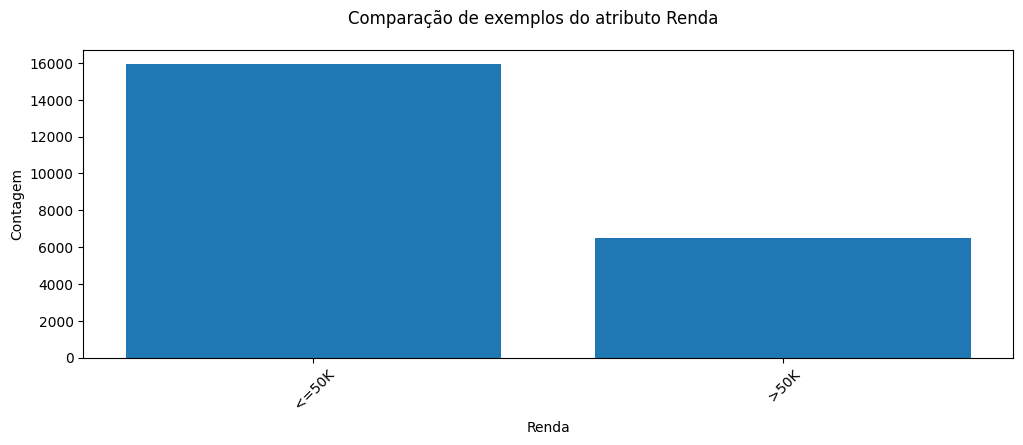

In [596]:
def plotar_grafico_renda(data_bal):
    class_counts = data_bal['Renda'].value_counts()
    plt.figure(figsize=(12, 4))
    plt.bar(class_counts.index, class_counts.values)
    plt.xlabel('Renda')
    plt.suptitle('Comparação de exemplos do atributo Renda')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()
plotar_grafico_renda(data_bal)

> Outra forma de verificar se a base de dados é balanceada, é através de gráficos, que ajudam visualizar melhor a proporção de exemplos das classes, ficando mais claro a diferença de exemplos entre as classes.

## Oversampling

> Consiste em **aumentar** a quantidade de instâncias da **classe minoritária**, replicando ou gerando novos exemplos. Isso ajuda a equilibrar a distribuição das classes.

A base de dados é balanceada.
E possui 31848 exemplos.


,Quantidade,Porcentagem
Renda,,
<=50K,15924,50.00%
>50K,15924,50.00%


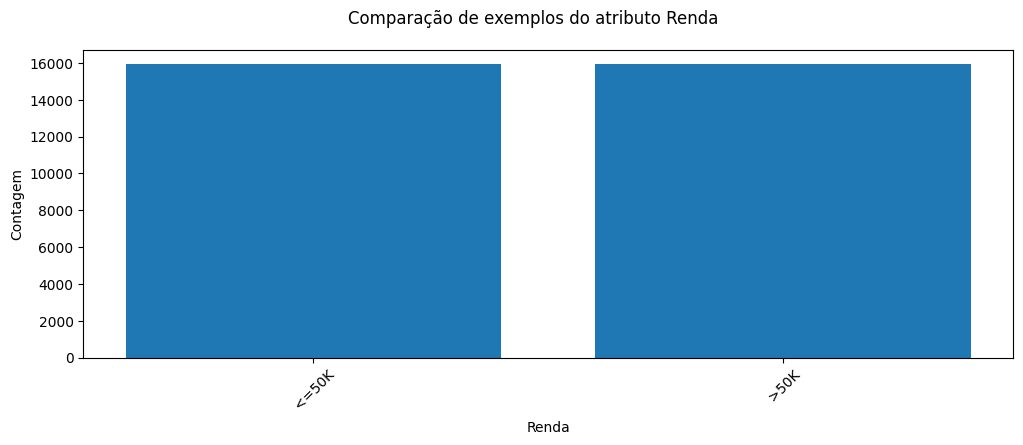

In [637]:
def perform_oversampling(data, target_column):
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    oversampler = RandomOverSampler()
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_data = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_data

oversample_data = perform_oversampling(data_bal, 'Renda')
verificar_balanceamento(oversample_data)
plotar_grafico_renda(oversample_data)

> Nota-se que a proporção de ambas as classes se tornou balanceada com um equilíbrio de **50% ~ 50%.**
> 
> Utilizando-se a biblioteca RandomOverSampler, é possível selecionar indivíduos da classe minoritária e replica-los novamente, a fim de equilibrar ambas as classes.

## Undersampling

> Envolve a **redução** da quantidade de instâncias da **classe majoritária**, removendo ou aleatoriamente amostrando exemplos. Isso ajuda a equilibrar a distribuição das classes.

A base de dados é balanceada.
E possui 12952 exemplos.


,Quantidade,Porcentagem
Renda,,
<=50K,6476,50.00%
>50K,6476,50.00%


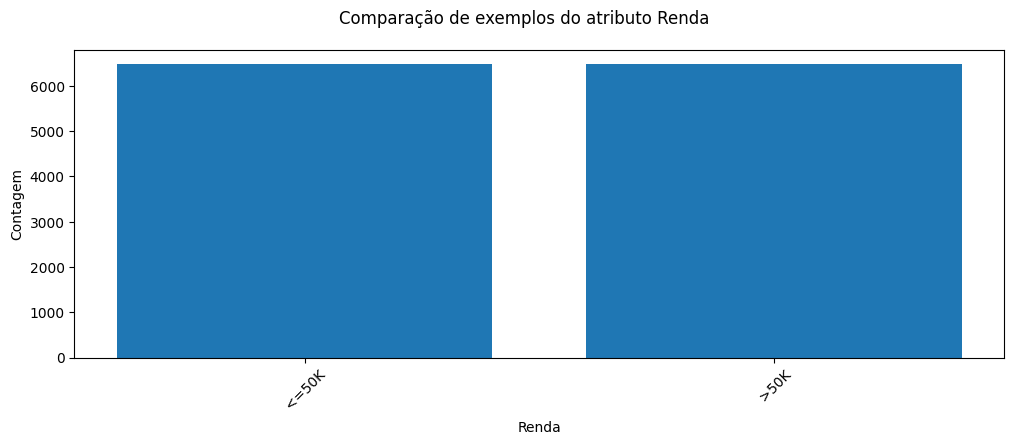

In [638]:
def perform_undersampling(data, target_column):
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    undersampler = RandomUnderSampler()
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_data = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_data
undersample_data = perform_undersampling(data_bal, 'Renda')
verificar_balanceamento(undersample_data)
plotar_grafico_renda(undersample_data)

> Nota-se novamente o balanceamento de ambas as classes com a mesma proporção entre elas (50% ~ 50%), porém, agora a base de dados está com uma quantidade de exemplos menor, uma vez que foram **removidos exemplos** da **classe majoritária** a fim de possibilitar tal equilíbrio.

## Conclusão

> As técnicas de **oversampling** e **undersampling** são métodos comumente utilizados para lidar com desequilíbrio de classes em conjuntos de dados. Pode-se concluir que:
> 
> **Oversampling:**
>> **Prós:**
>> **Aumenta** a quantidade de exemplos da **classe minoritária**, tornando-a mais representativa.
Preserva as informações dos exemplos existentes, gerando novos exemplos sintéticos com base nos existentes.
Pode melhorar a capacidade do modelo de aprender padrões da classe minoritária.
>>
>> **Contras:**
>> Pode levar ao superajustamento **(overfitting)** do modelo, especialmente quando o oversampling é aplicado em excesso.
Aumenta o tempo de treinamento do modelo, já que a quantidade de dados é aumentada.
> 
> **Undersampling:**
>> **Prós:**
>> **Reduz** a quantidade de exemplos da **classe majoritária**, tornando o conjunto de dados mais balanceado.
Reduz o tempo de treinamento do modelo, pois a quantidade de dados é reduzida.
Pode ajudar a mitigar o viés do modelo em direção à classe majoritária.
>> 
>> **Contras:**
>> Pode levar à **perda de informações importantes** presentes nos exemplos da classe majoritária.
Pode resultar em uma representação inadequada da classe majoritária, levando a uma redução na capacidade do modelo de generalizar.

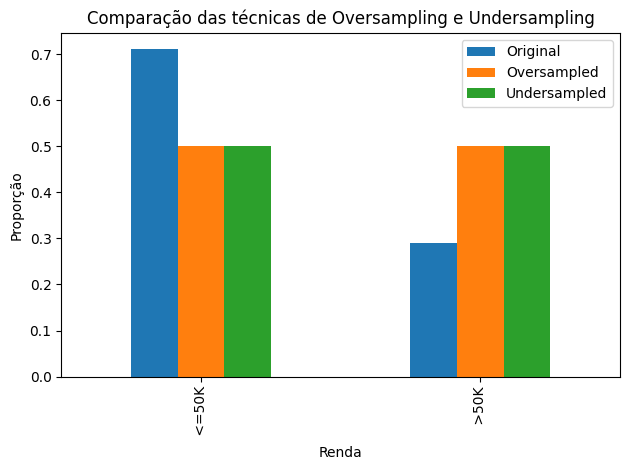

In [648]:
def compare_sampling(data_original, data_oversampled, data_undersampled, target_column):
    original_counts = data_original[target_column].value_counts(normalize=True)
    oversampled_counts = data_oversampled[target_column].value_counts(normalize=True)
    undersampled_counts = data_undersampled[target_column].value_counts(normalize=True)

    comparison_df = pd.DataFrame({
        'Original': original_counts,
        'Oversampled': oversampled_counts,
        'Undersampled': undersampled_counts
    }).sort_index()

    fig, ax = plt.subplots()
    comparison_df.plot(kind='bar', ax=ax)
    ax.set_ylabel('Proporção')
    ax.set_xlabel('Renda')

    plt.title('Comparação das técnicas de Oversampling e Undersampling')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
compare_sampling(data_bal, oversample_data, undersample_data, 'Renda')

# Conversão de Dados🔄

> Conversão de dados é o processo de transformar os dados de um formato ou tipo para outro, a fim de atender às necessidades específicas de análise, armazenamento ou processamento.

In [557]:
data_conv = data_clean.copy()

> Analisando todos os atributos da base de dados,

In [558]:
def convert_class_to_boolean(data, target_column):
    data[target_column] = data[target_column].astype(bool)
    data[target_column] = data[target_column].map({'>50K': True, '<=50K': False})
    return data

data_conv = convert_class_to_boolean(data_conv, 'Renda')

In [559]:
data_conv.head(10)

,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
0,39,State-gov,Bachelors,13,Adm-clerical,2174,0,40,NaN
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,0,0,13,NaN
2,38,Private,HS-grad,9,Handlers-cleaners,0,0,40,NaN
3,53,Private,11th,7,Handlers-cleaners,0,0,40,NaN
4,28,Private,Bachelors,13,Prof-specialty,0,0,40,NaN
5,37,Private,Masters,14,Exec-managerial,0,0,40,NaN
6,49,Private,9th,5,Other-service,0,0,16,NaN
7,52,Self-emp-not-inc,HS-grad,9,Exec-managerial,0,0,45,NaN
8,31,Private,Masters,14,Prof-specialty,14084,0,50,NaN
9,42,Private,Bachelors,13,Exec-managerial,5178,0,40,NaN


In [561]:
data_conv['Renda'] == '<=50K'

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32551    NaN
32553    NaN
32554    NaN
32555    NaN
32556    NaN
Name: Renda, Length: 22864, dtype: object

In [560]:
data_conv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22864 entries, 0 to 32556
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Idade                22864 non-null  int64 
 1   Classe Trabalhadora  22864 non-null  object
 2   Educacao             22864 non-null  object
 3   Num Educacao         22864 non-null  int64 
 4   Ocupacao             22864 non-null  object
 5   Ganho de Capital     22864 non-null  int64 
 6   Perda de Capital     22864 non-null  int64 
 7   Horas por Semana     22864 non-null  int64 
 8   Renda                0 non-null      object
dtypes: int64(5), object(4)
memory usage: 1.7+ MB


# Redução de Dimensionalidade📉

> Redução de dimensionalidade é o processo de simplificar os dados removendo variáveis irrelevantes ou redundantes, tornando a análise mais eficiente e compacta.